In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("data/accepted_2007_to_2018Q4.csv",low_memory=False)

In [4]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
3  66310712        NaN    35000.0      35000.0          35000.0   60 months   
4  68476807        NaN    10400.0      10400.0          10400.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.99       123.03     C        C4  ...                            NaN   
1     11.99       820.28     C        C1  ...                            NaN   
2     10.78       432.66     B        B4  ...                            NaN   
3     14.85       829.90     C        C5  ...                            NaN   
4     22.45       289.91     F        F1  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0                          NaN                Cash                     N   
1                          NaN                Cash                     N   
2                          NaN                Cash                     N   
3                          NaN                Cash                     N   
4                          NaN                Cash                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   
3                       NaN               NaN             NaN   
4                       NaN               NaN             NaN   

  settlement_amount settlement_percentage settlement_term  
0               NaN                   NaN             NaN  
1               NaN                   NaN             NaN  
2               NaN                   NaN             NaN  
3               NaN                   NaN             NaN  
4               NaN                   NaN             NaN  

[5 rows x 151 columns]

In [5]:
# Number of Rows
len(df)

2260701

In [6]:
# List all the columns
list(df)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [7]:
# Check load_status column values
df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [8]:
# Dropping rows having loan_status other than Fully Paid and Charged Off. ( The desired outputs)
df = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')]

In [9]:
len(df)

1345310

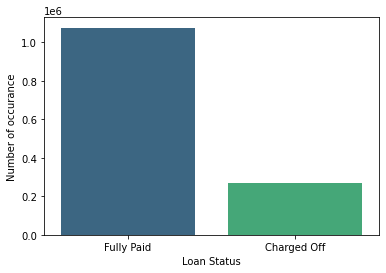

In [10]:
# Checking to see if anything other than "Fully Paid" or "Charged Off" is there

ax = sns.countplot(x=df['loan_status'], data=df, palette='viridis')
ax.set(xlabel="Loan Status",ylabel="Number of occurance")

plt.show()

In [11]:
df.shape

(1345310, 151)

In [12]:
# Need to clean up and check this huge data
# Checking for percentage of null values in columns
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

next_pymnt_d                                  100.000000
member_id                                     100.000000
orig_projected_additional_accrued_interest     99.720585
hardship_start_date                            99.572292
hardship_length                                99.572292
                                                 ...    
pub_rec                                         0.000000
open_acc                                        0.000000
fico_range_high                                 0.000000
fico_range_low                                  0.000000
id                                              0.000000
Length: 151, dtype: float64

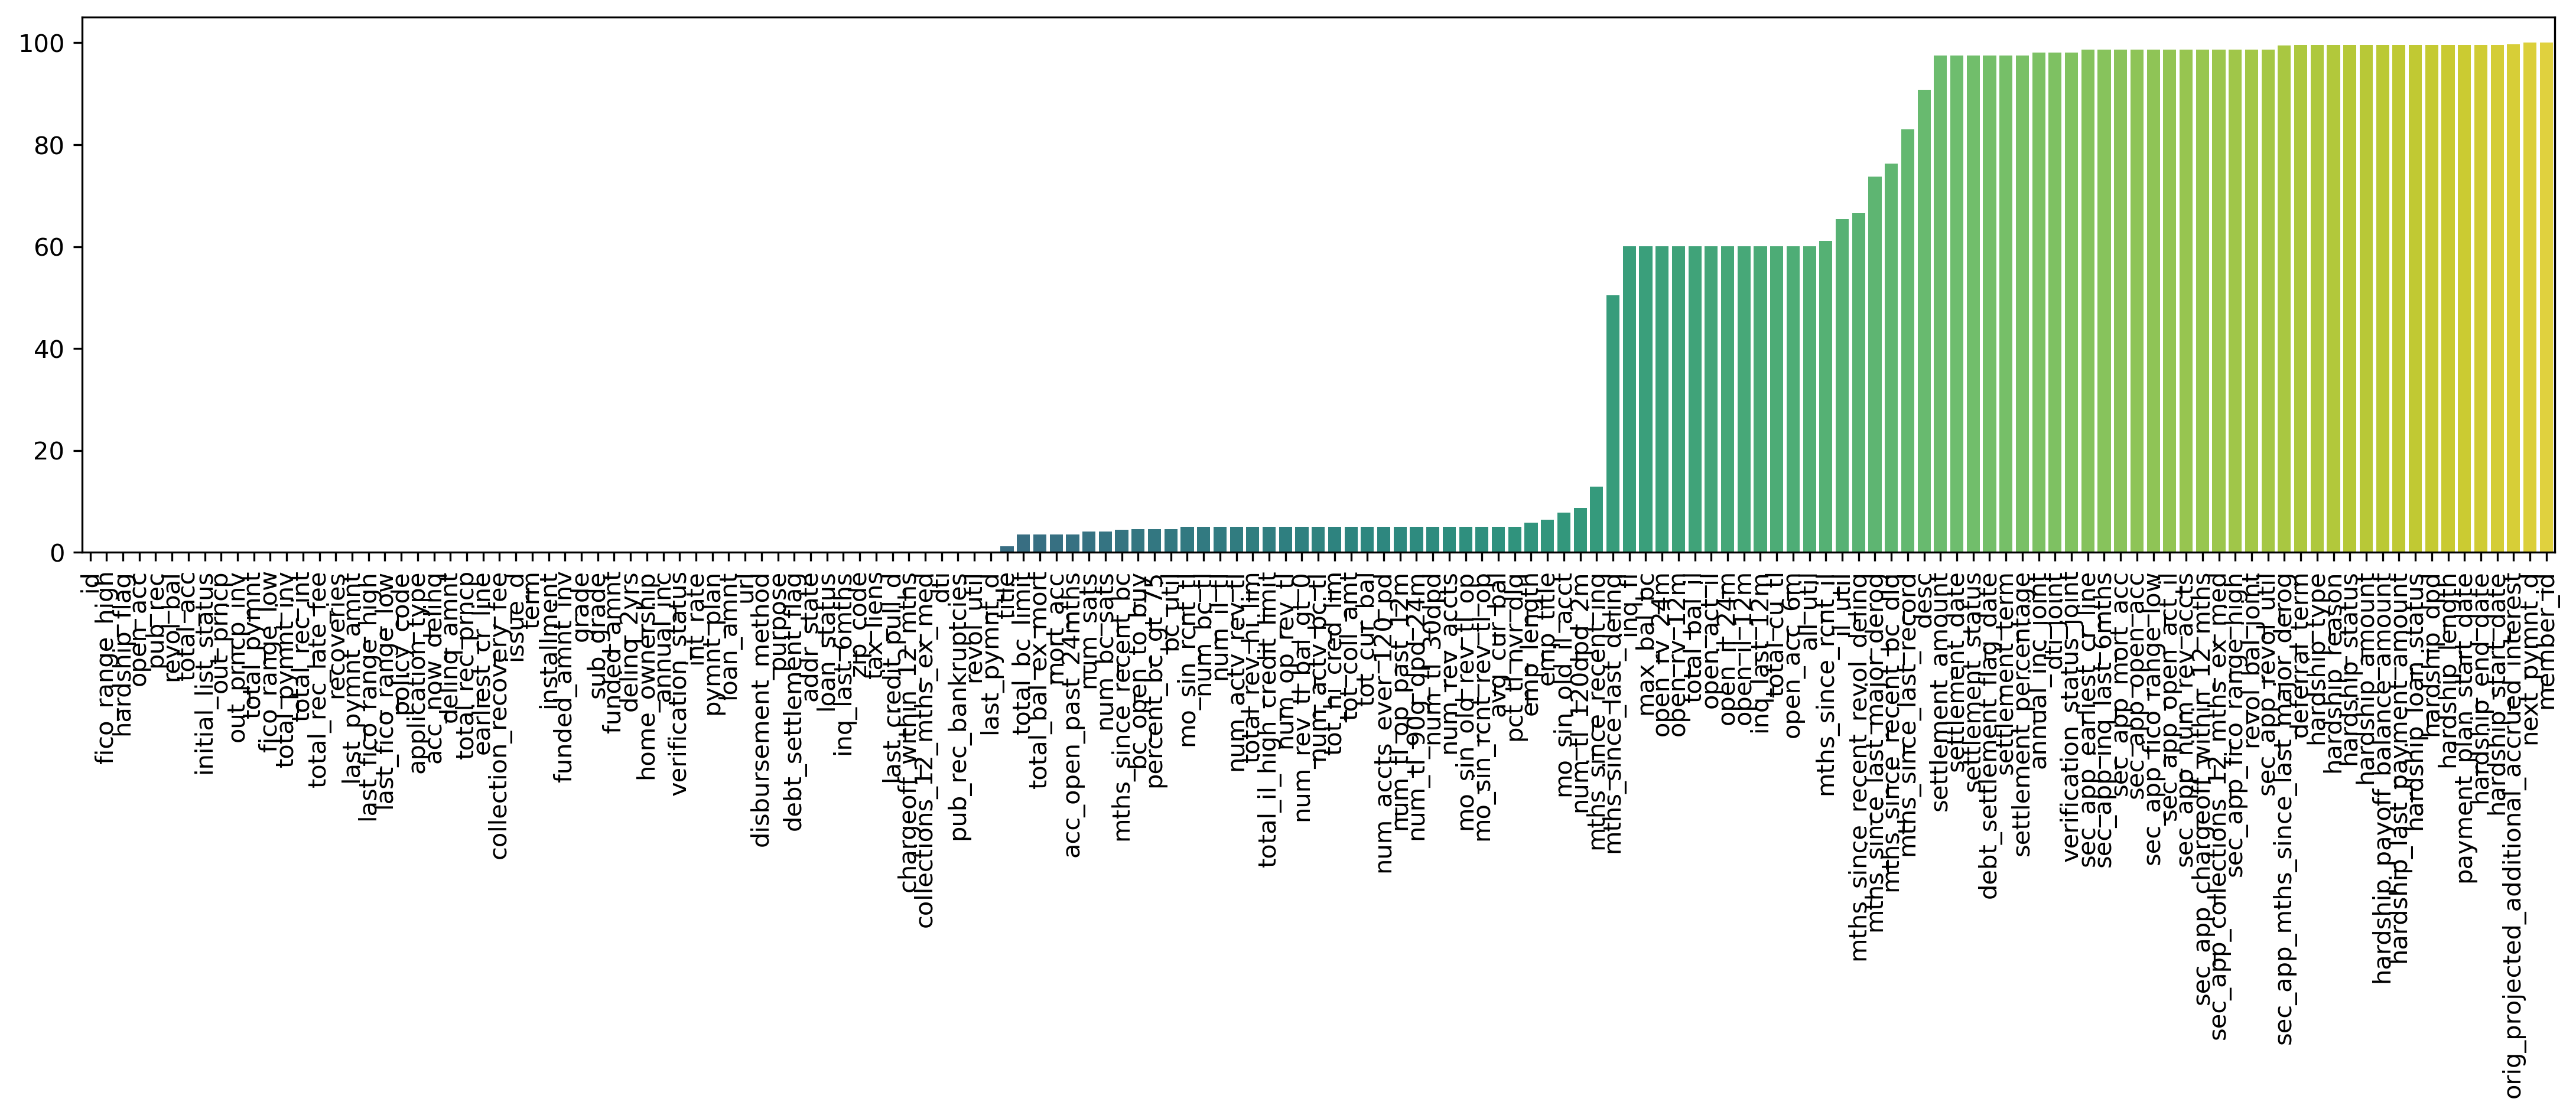

In [13]:
# Plotting to check null values

plt.figure(figsize=(18,4),dpi=300) # make image larger and clearer
# y contains the % of missing values od each column and x is the index of the series in above cell
sns.barplot(y=((df.isnull().sum()/len(df))*100).sort_values(), x=((df.isnull().sum()/len(df))*100).sort_values().index, palette='viridis') 
plt.xticks(rotation=90);

In [14]:
# The data set is huge, it'll be hardware inefficient to take 151 features into account. 
# So, we need to reduce the number of features drastically
# So dropping columns with more than 50% of missing datas. We could have filled with missing values, 
# but again, we need to reduce numbers of features 
keep = df.columns[((df.isnull().sum()/len(df))*100 < 50)].to_list()
keep

['id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'ch

In [15]:
len(keep)
# Reduced to 93 Features

93

In [16]:
df = df[keep] # Dropping featuressss with greater than 50% null values

In [17]:
df.shape

(1345310, 93)

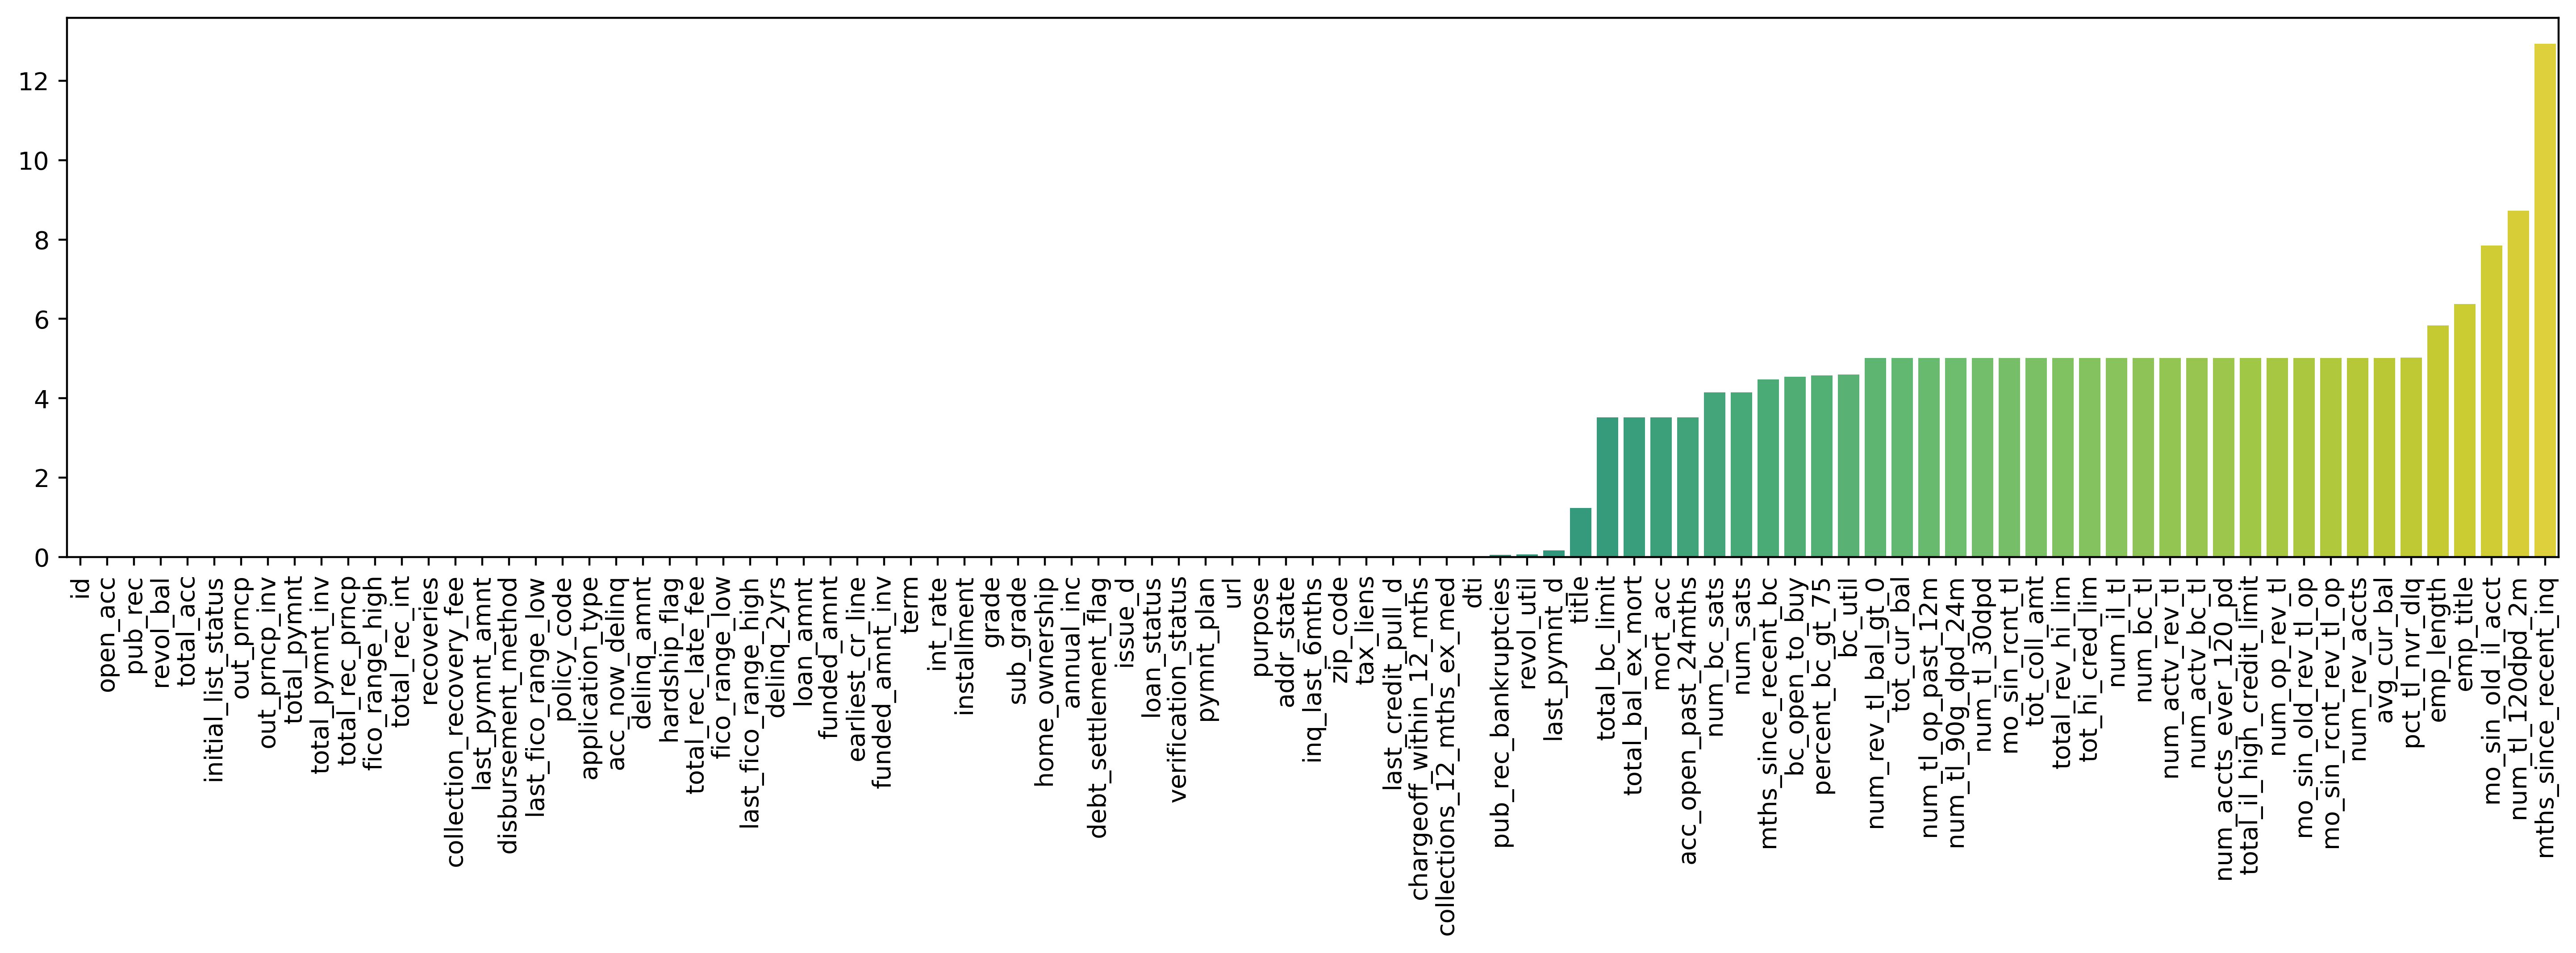

In [18]:
# Plotting again to check the column's null values
plt.figure(figsize=(18,4),dpi=400)
sns.barplot(y=((df.isnull().sum()/len(df))*100).sort_values(), x=((df.isnull().sum()/len(df))*100).sort_values().index, palette='viridis')
plt.xticks(rotation=90);

In [19]:
# We now select 27 features to work with
final_features = ['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 
                  'grade', 'home_ownership', 'application_type','initial_list_status', 'int_rate', 'loan_amnt', 'num_actv_bc_tl', 
                  'loan_status', 'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 
                  'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status']

In [20]:
# Dropping all the other features
df = df[final_features]

In [21]:
df.shape

(1345310, 28)

In [22]:
# Data is now cleaned
df

addr_state  annual_inc earliest_cr_line emp_length  \
0               PA     55000.0         Aug-2003  10+ years   
1               SD     65000.0         Dec-1999  10+ years   
2               IL     63000.0         Aug-2000  10+ years   
4               PA    104433.0         Jun-1998    3 years   
5               GA     34000.0         Oct-1987    4 years   
...            ...         ...              ...        ...   
2260688         TX    130000.0         Jul-2004    5 years   
2260690         CA    180792.0         Mar-2002    9 years   
2260691         AZ    157000.0         Jun-2011    3 years   
2260692         NC    150000.0         Aug-1997  10+ years   
2260697         FL    110000.0         Jul-1999    6 years   

                       emp_title  fico_range_high  fico_range_low grade  \
0                        leadman            679.0           675.0     C   
1                       Engineer            719.0           715.0     C   
2                   truck driver            699.0           695.0     B   
4            Contract Specialist            699.0           695.0     F   
5           Veterinary Tecnician            694.0           690.0     C   
...                          ...              ...             ...   ...   
2260688                      NaN            739.0           735.0     B   
2260690  Chief Operating Officer            709.0           705.0     C   
2260691            Sales Manager            739.0           735.0     C   
2260692                  Manager            669.0           665.0     C   
2260697          Program Manager            664.0           660.0     C   

        home_ownership application_type  ... pub_rec  pub_rec_bankruptcies  \
0             MORTGAGE       Individual  ...     0.0                   0.0   
1             MORTGAGE       Individual  ...     0.0                   0.0   
2             MORTGAGE        Joint App  ...     0.0                   0.0   
4             MORTGAGE       Individual  ...     0.0                   0.0   
5                 RENT       Individual  ...     0.0                   0.0   
...                ...              ...  ...     ...                   ...   
2260688            OWN       Individual  ...     0.0                   0.0   
2260690       MORTGAGE       Individual  ...     0.0                   0.0   
2260691       MORTGAGE       Individual  ...     0.0                   0.0   
2260692           RENT       Individual  ...     4.0                   3.0   
2260697           RENT       Individual  ...     1.0                   1.0   

                    purpose  revol_bal revol_util  sub_grade        term  \
0        debt_consolidation     2765.0       29.7         C4   36 months   
1            small_business    21470.0       19.2         C1   36 months   
2          home_improvement     7869.0       56.2         B4   60 months   
4            major_purchase    21929.0       64.5         F1   60 months   
5        debt_consolidation     8822.0       68.4         C3   36 months   
...                     ...        ...        ...        ...         ...   
2260688    home_improvement    23833.0       34.0         B2   60 months   
2260690  debt_consolidation    77480.0       85.2         C3   60 months   
2260691    home_improvement   111598.0       27.4         C4   60 months   
2260692             medical     7700.0       55.0         C1   60 months   
2260697  debt_consolidation    17641.0       68.1         C4   60 months   

                      title  total_acc  verification_status  
0        Debt consolidation       13.0         Not Verified  
1                  Business       38.0         Not Verified  
2                       NaN       18.0         Not Verified  
4            Major purchase       35.0      Source Verified  
5        Debt consolidation        6.0      Source Verified  
...                     ...        ...                  ...  
2260688    Home improvement       39.0         Not Verified  
2260690  Debt co

In [23]:
# Checking data types of columns
df.dtypes.value_counts()

object     14
float64    14
dtype: int64

In [24]:
# 14 categorical values
df['loan_status'] # The feature needs to be predicted

0           Fully Paid
1           Fully Paid
2           Fully Paid
4           Fully Paid
5           Fully Paid
              ...     
2260688     Fully Paid
2260690     Fully Paid
2260691    Charged Off
2260692     Fully Paid
2260697    Charged Off
Name: loan_status, Length: 1345310, dtype: object

In [25]:
# Copying the df to create another df with categorical feature converted to numeric
df_temp = df.copy() 
df_temp['loan_status'] = pd.get_dummies(df_temp['loan_status'], drop_first=True)

In [26]:
df_temp['loan_status']
# We can see that Fully Paid is converted to 1 and Charged off is converted to 0

0          1
1          1
2          1
4          1
5          1
          ..
2260688    1
2260690    1
2260691    0
2260692    1
2260697    0
Name: loan_status, Length: 1345310, dtype: uint8

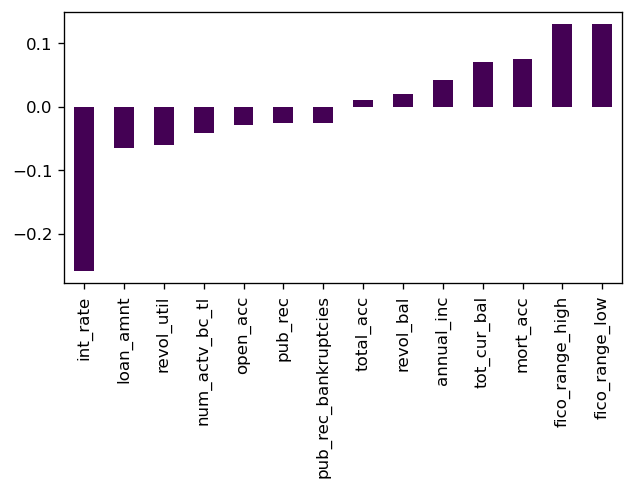

In [27]:
# Now Let's see which data it corelates into the best
plt.figure(figsize=(6,3),dpi=120)
df_temp.corr()['loan_status'].sort_values().drop('loan_status').plot(kind='bar', cmap='viridis') # correlation with loan_status for continuous features with loan_status feature dropped
plt.xticks(rotation=90); 

# int_rate, fico_range_high and fico_range_low are highly correlated with loan_status compared to other features.


In [28]:
# # Correlation matrix if needed
# plt.figure(figsize=(20,10)) 
# sns.heatmap(df_temp.corr(), annot=True)
# plt.show(block=True)

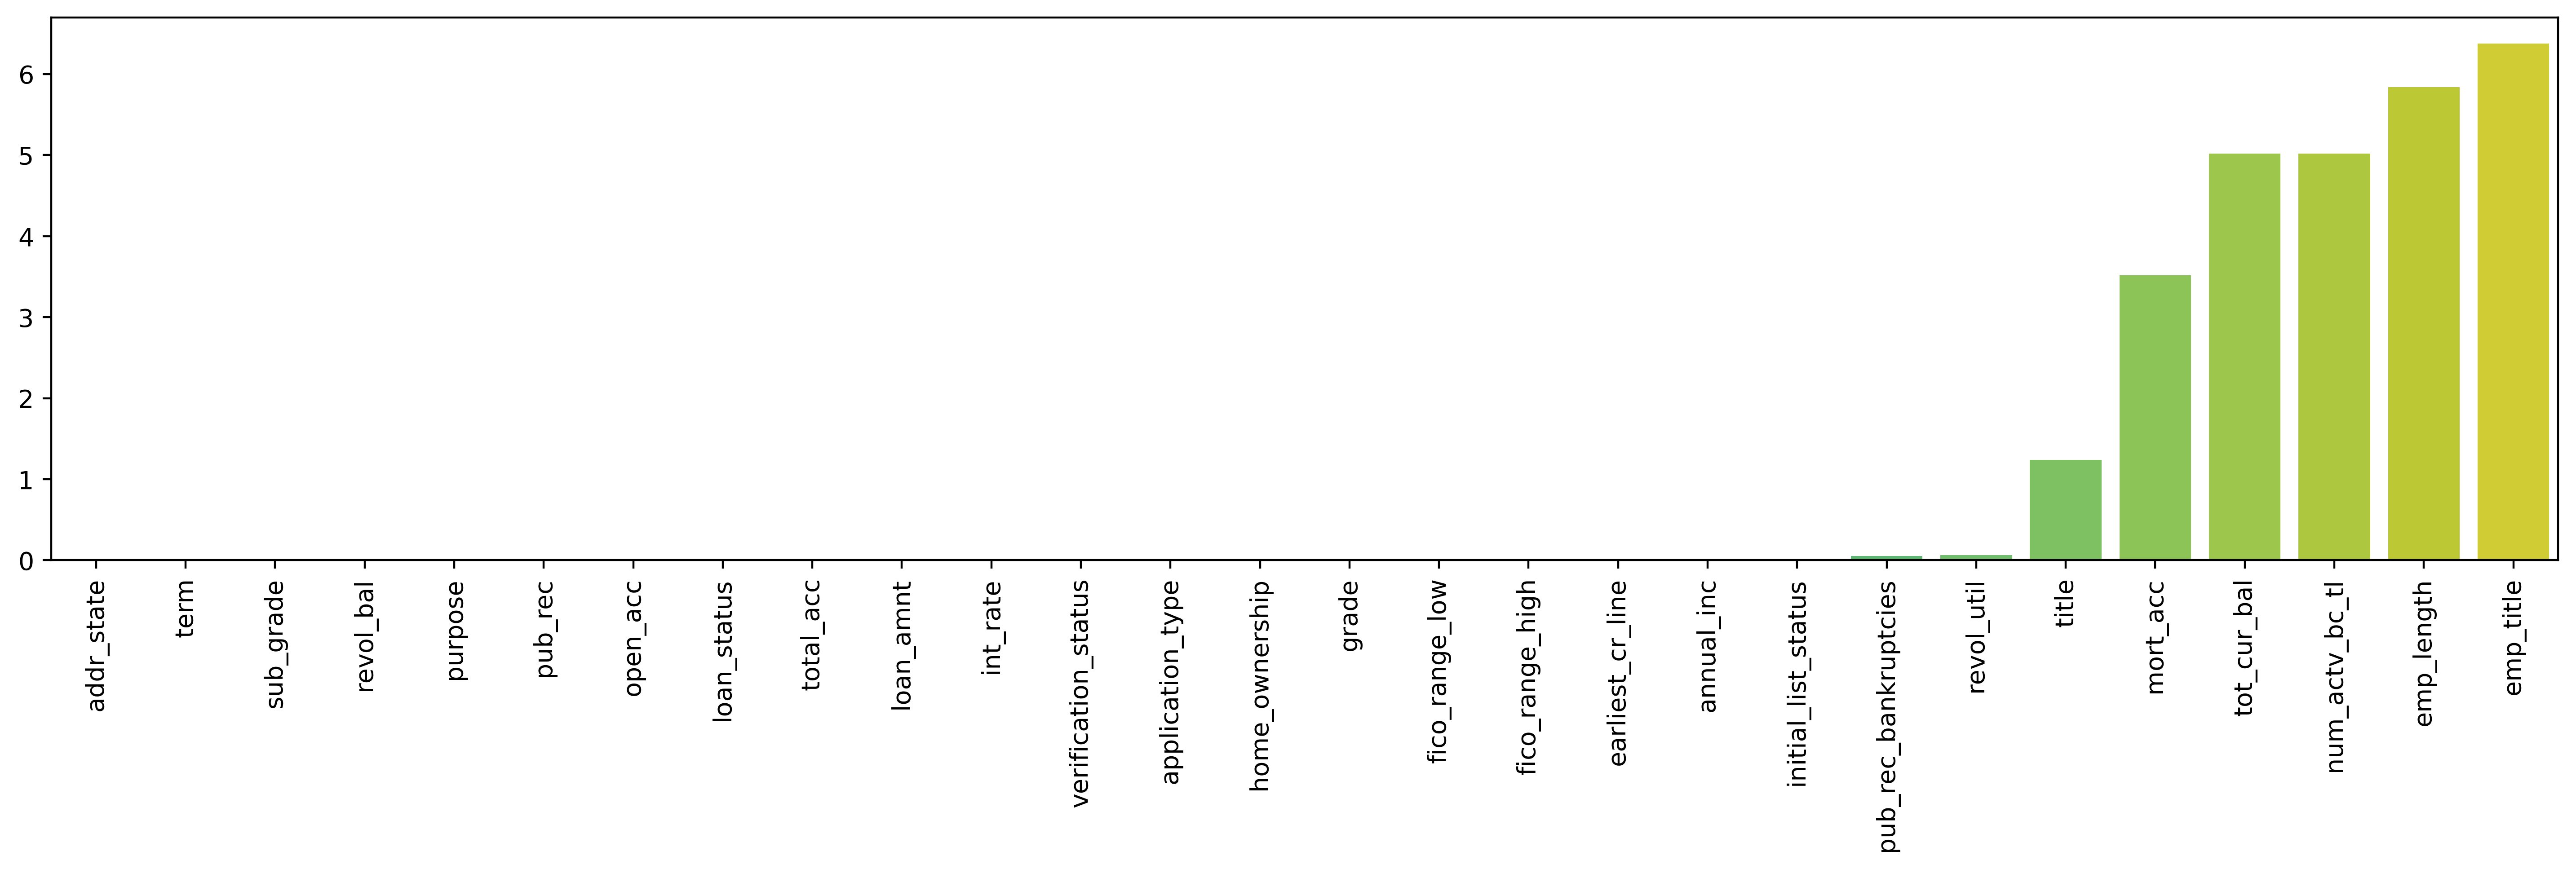

In [29]:
# Again coming to missing values calculation
plt.figure(figsize=(18,4),dpi=400)
sns.barplot(y=((df.isnull().sum()/len(df))*100).sort_values(), x=((df.isnull().sum()/len(df))*100).sort_values().index, palette='viridis')
plt.xticks(rotation=90);

In [30]:
# Columns with missing values and % of missing values.

df_missing = ((df.isnull().sum()/len(df))*100)[((df.isnull().sum()/len(df))*100) > 0]
df_missing

emp_length              5.835904
emp_title               6.376597
num_actv_bc_tl          5.019438
mort_acc                3.514506
tot_cur_bal             5.019438
pub_rec_bankruptcies    0.051810
revol_util              0.063703
title                   1.238302
dtype: float64

In [31]:
# Function to check null values of any columns

def if_null_values(feat_name):
    if feat_name in df_missing:
        return(f"% of missing values = {df_missing[feat_name].round(2)}")
    else:
        return("No missing values")

In [32]:
# There are 14 categorical values, let's check which one is important and convert to numerical form
# Feature 1 : Start with addr_state
if_null_values('addr_state')

'No missing values'

In [33]:
df['addr_state'].unique()

array(['PA', 'SD', 'IL', 'GA', 'MN', 'SC', 'RI', 'NC', 'CA', 'VA', 'AZ',
       'IN', 'MD', 'NY', 'TX', 'KS', 'NM', 'AL', 'WA', 'OH', 'LA', 'FL',
       'CO', 'MI', 'MO', 'DC', 'MA', 'WI', 'HI', 'VT', 'NJ', 'DE', 'TN',
       'NH', 'NE', 'OR', 'CT', 'AR', 'NV', 'WV', 'MT', 'WY', 'OK', 'KY',
       'MS', 'UT', 'ND', 'ME', 'AK', 'ID', 'IA'], dtype=object)

In [34]:
len(df['addr_state'].unique())

51

In [35]:
df['addr_state'].value_counts()

CA    196528
TX    110169
NY    109842
FL     95606
IL     51720
NJ     48449
PA     45522
OH     43842
GA     43376
VA     38040
NC     37784
MI     35234
AZ     32695
MD     31227
MA     30977
CO     29671
WA     29188
MN     23968
IN     21716
MO     21260
TN     20385
NV     20267
CT     19728
WI     17732
AL     16613
OR     16406
SC     15992
LA     15499
KY     12839
OK     12281
KS     11240
AR     10047
UT     10036
NM      7362
HI      6757
MS      6588
NH      6449
RI      5871
WV      4878
MT      3823
DE      3783
NE      3586
DC      3475
AK      3190
WY      2922
SD      2767
VT      2652
ME      2030
ID      1689
ND      1602
IA         7
Name: addr_state, dtype: int64

In [36]:
# Converting to dummies (One hot encoding)
add_state_dummies = pd.get_dummies(df['addr_state'], drop_first=True) # drop_first will drop the first dummy column 
add_state_dummies

AL  AR  AZ  CA  CO  CT  DC  DE  FL  GA  ...  SD  TN  TX  UT  VA  VT  \
0         0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
1         0   0   0   0   0   0   0   0   0   0  ...   1   0   0   0   0   0   
2         0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
4         0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
5         0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   
...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
2260688   0   0   0   0   0   0   0   0   0   0  ...   0   0   1   0   0   0   
2260690   0   0   0   1   0   0   0   0   0   0  ...   0   0   0   0   0   0   
2260691   0   0   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
2260692   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
2260697   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   

         WA  WI  WV  WY  
0         0   0   0   0  
1         0   0   0   0  
2         0   0   0   0  
4         0   0   0   0  
5         0   0   0   0  
...      ..  ..  ..  ..  
2260688   0   0   0   0  
2260690   0   0   0   0  
2260691   0   0   0   0  
2260692   0   0   0   0  
2260697   0   0   0   0  

[1345310 rows x 50 columns]

In [37]:
# Add these features in the main dataset
df = pd.concat([df.drop('addr_state', axis=1), add_state_dummies], axis=1)

In [38]:
# Feature 2 : annual_inc
if_null_values('annual_inc')

'No missing values'

In [39]:
df['annual_inc'].describe()

count    1.345310e+06
mean     7.624764e+04
std      6.992510e+04
min      0.000000e+00
25%      4.578000e+04
50%      6.500000e+04
75%      9.000000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

<AxesSubplot:ylabel='Density'>

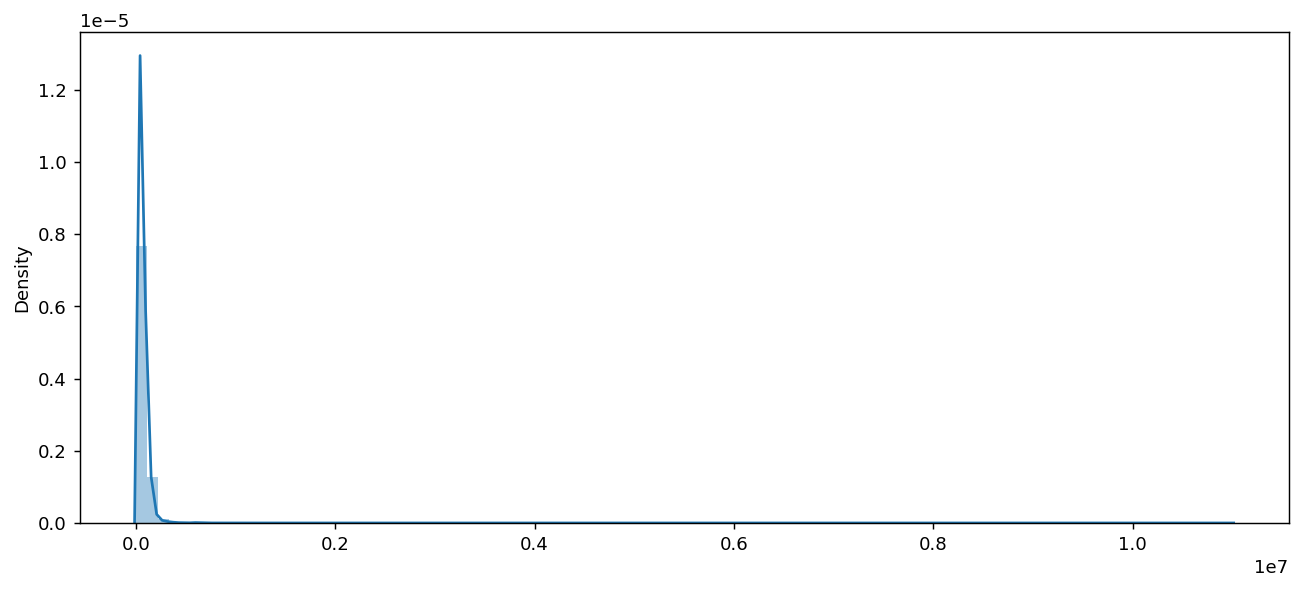

In [40]:
# Let's plot the distribution of annual_inc
plt.figure(figsize=(12,5), dpi=130)
sns.distplot(x=df['annual_inc'], bins=100)

In [41]:
# The salary distribution is highly skewed towards right.
# Let's find how many customers have annual_inc > $250000.
len(df[df['annual_inc'] > 250000])

13447

In [42]:
# % of rows with annual income > $250000.
percent_of_rows_of_customers_with_annual_inc_more_than_250000 = 13447*100/len(df) 
percent_of_rows_of_customers_with_annual_inc_more_than_250000

0.9995465729088463

In [43]:
# There are 13447 rows of customers with annual_inc > 250000, i.e., 1%. Since these are outliers, let's drop these rows.
# Lets remove the rows with annual_inc > $250000
df = df[df['annual_inc'] <= 250000]
len(df)

1331863

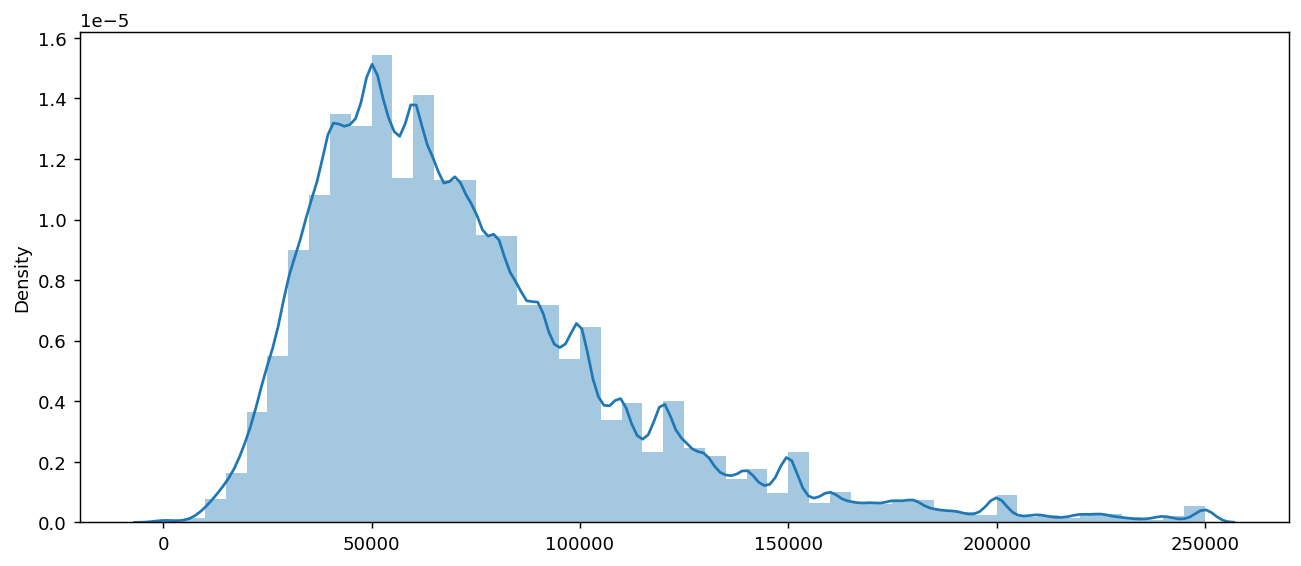

In [44]:
# plotting distribution again
plt.figure(figsize=(12,5), dpi=130)
sns.distplot(x=df['annual_inc']);
# Now it's better than before

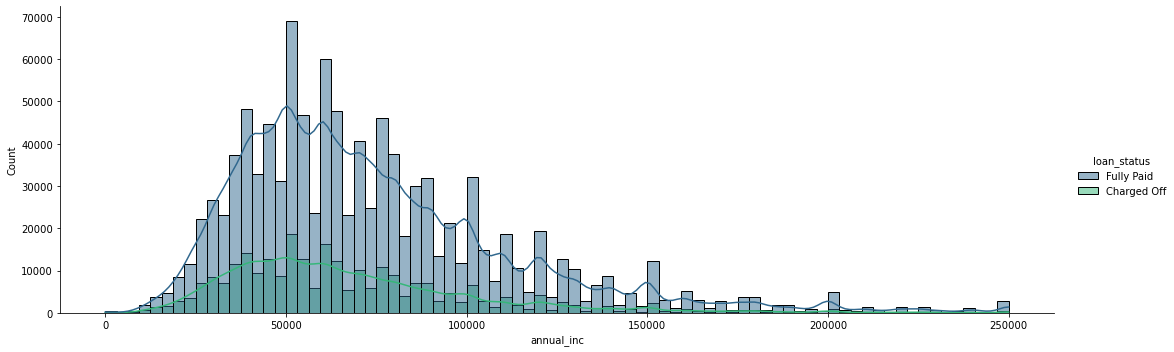

In [45]:
# Lets check the distributions of annual income of customers who fully paid the loan whose loan was charged off.

sns.displot(data=df, x='annual_inc', hue='loan_status', bins=80, height=5, aspect=3, kde=True, palette='viridis');

In [46]:
df.groupby('loan_status')['annual_inc'].describe()

# The mean annual_inc for customers who fully paid the loan and who did not differs by around $5000

count          mean           std  min      25%      50%  \
loan_status                                                                 
Charged Off   266811.0  68055.652212  36117.261680  0.0  43000.0  60000.0   
Fully Paid   1065052.0  73988.660933  38990.308826  0.0  46763.0  65000.0   

                 75%       max  
loan_status                     
Charged Off  84000.0  250000.0  
Fully Paid   91000.0  250000.0

In [47]:
# Feature 3 : earliest_cr_line
# The month the borrower's earliest reported credit line was opened.
if_null_values('earliest_cr_line')

'No missing values'

In [48]:
df['earliest_cr_line'].head()

0    Aug-2003
1    Dec-1999
2    Aug-2000
4    Jun-1998
5    Oct-1987
Name: earliest_cr_line, dtype: object

In [49]:
# Removing the month and only keeping the year

df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [50]:
df['earliest_cr_line'].head()

0    2003
1    1999
2    2000
4    1998
5    1987
Name: earliest_cr_line, dtype: int64

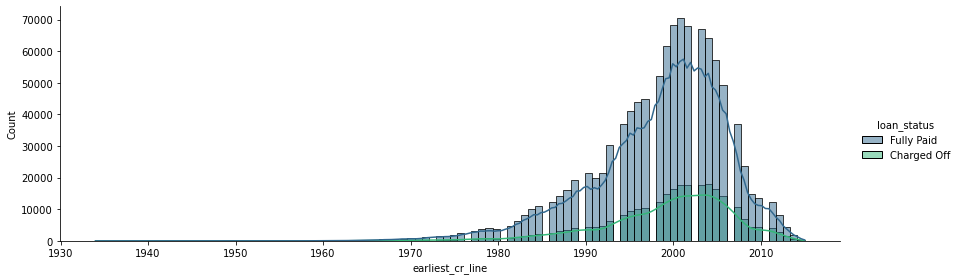

In [51]:
# Check distributions
sns.displot(data=df, x='earliest_cr_line', hue='loan_status', bins=100, height=4, aspect=3, kde=True, palette='viridis');

In [52]:
df.groupby('loan_status')['earliest_cr_line'].describe()

# Mean earliest_cr_line for customers who fully paid the loan was approx. 1 year before the customers who did not pay the loan.

count         mean       std     min     25%     50%     75%  \
loan_status                                                                     
Charged Off   266811.0  1999.386109  7.571525  1944.0  1996.0  2001.0  2004.0   
Fully Paid   1065052.0  1998.572051  7.589442  1934.0  1995.0  2000.0  2004.0   

                max  
loan_status          
Charged Off  2015.0  
Fully Paid   2015.0

In [53]:
# Feature 4 : Let's check emp_length now
if_null_values('emp_length')

'% of missing values = 5.84'

In [54]:
df['emp_length'].head()

0    10+ years
1    10+ years
2    10+ years
4      3 years
5      4 years
Name: emp_length, dtype: object

<AxesSubplot:xlabel='emp_length', ylabel='count'>

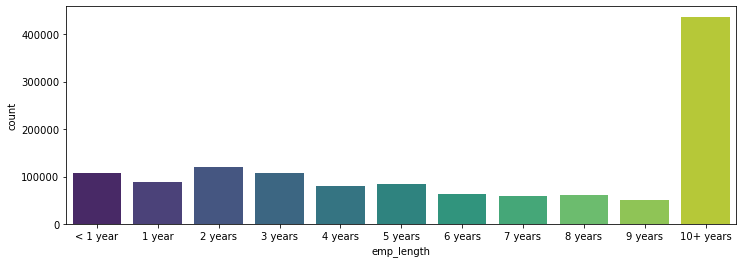

In [55]:
emp_length_order = [ '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', 
                    '7 years', '8 years', '9 years', '10+ years']

plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order, palette='viridis')

<AxesSubplot:xlabel='emp_length', ylabel='count'>

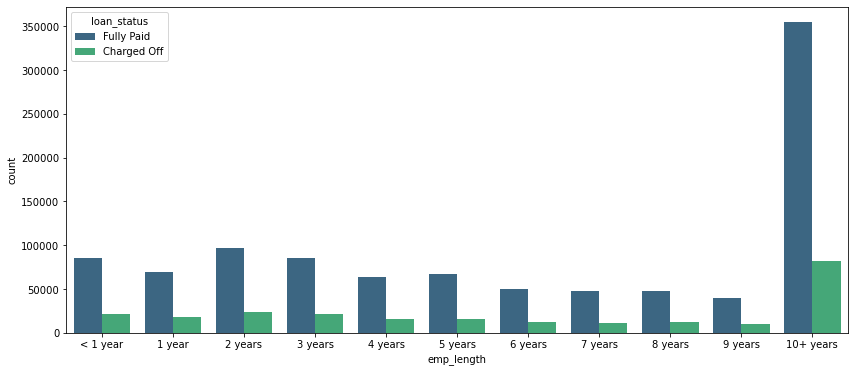

In [56]:
plt.figure(figsize=(14,6))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status', palette='viridis')

In [57]:
# The data is random basically, still it's not indicating any relationship with output
# Let's calculate the % of charged off customers per year
emp_charged_off = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fully_paid = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']
percentage_charged_off = (emp_charged_off * 100)/(emp_charged_off + emp_fully_paid)
percentage_charged_off

emp_length
1 year       20.622963
10+ years    18.873425
2 years      19.852368
3 years      20.028168
4 years      19.801185
5 years      19.661848
6 years      19.423312
7 years      19.563412
8 years      19.987345
9 years      20.002777
< 1 year     20.560425
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

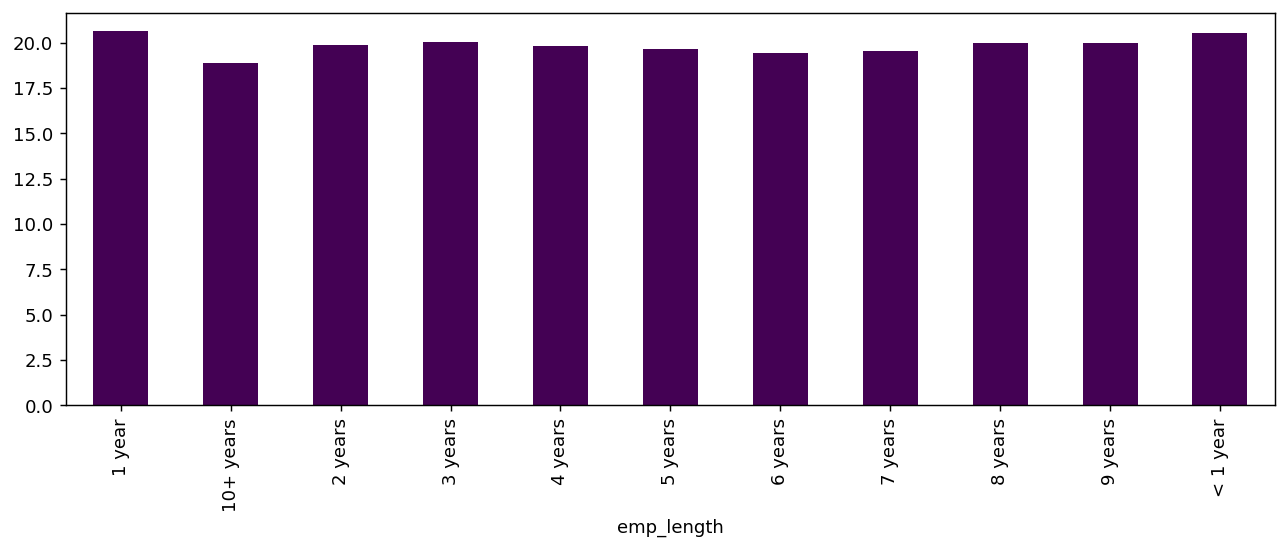

In [58]:
plt.figure(figsize=(12,4), dpi=130)
percentage_charged_off.plot(kind='bar', cmap='viridis')

In [59]:
# This feature is not so much useful, we can drop this feature
df = df.drop('emp_length', axis=1)

In [60]:
print(df.columns)
df.shape

Index(['annual_inc', 'earliest_cr_line', 'emp_title', 'fico_range_high',
       'fico_range_low', 'grade', 'home_ownership', 'application_type',
       'initial_list_status', 'int_rate', 'loan_amnt', 'num_actv_bc_tl',
       'loan_status', 'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec',
       'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'AL',
       'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID',
       'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS',
       'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR',
       'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV',
       'WY'],
      dtype='object')


(1331863, 76)

In [61]:
# Feature 5: Now taking emp_title in account
if_null_values('emp_title')

'% of missing values = 6.38'

In [62]:
df['emp_title'].describe()

count     1246413
unique     375574
top       Teacher
freq        21258
Name: emp_title, dtype: object

In [63]:
# There are 375574 unique titles. We can't create dummies as this is too many. Dropping this feature too
df = df.drop('emp_title', axis=1)

In [64]:
# Feature 6 & 7: Now working with fico_range_high and fico_range_low
if_null_values('fico_range_high')

'No missing values'

In [65]:
if_null_values('fico_range_low')

'No missing values'

In [66]:
df['fico_range_high'].describe()

count    1.331863e+06
mean     7.000659e+02
std      3.178703e+01
min      6.290000e+02
25%      6.740000e+02
50%      6.940000e+02
75%      7.140000e+02
max      8.500000e+02
Name: fico_range_high, dtype: float64

In [67]:
df['fico_range_low'].describe()

count    1.331863e+06
mean     6.960658e+02
std      3.178640e+01
min      6.250000e+02
25%      6.700000e+02
50%      6.900000e+02
75%      7.100000e+02
max      8.450000e+02
Name: fico_range_low, dtype: float64

In [68]:
# Both fico_range_high and fico_range_low have similar mean and standard deviation. So, we will use mean of both scores.
df['fico'] = (df['fico_range_high'] + df['fico_range_low']) / 2
df['fico']

0          677.0
1          717.0
2          697.0
4          697.0
5          692.0
           ...  
2260688    737.0
2260690    707.0
2260691    737.0
2260692    667.0
2260697    662.0
Name: fico, Length: 1331863, dtype: float64

In [69]:
df = df.drop(['fico_range_high', 'fico_range_low'], axis=1)

In [70]:
df.shape

(1331863, 74)

<AxesSubplot:ylabel='Density'>

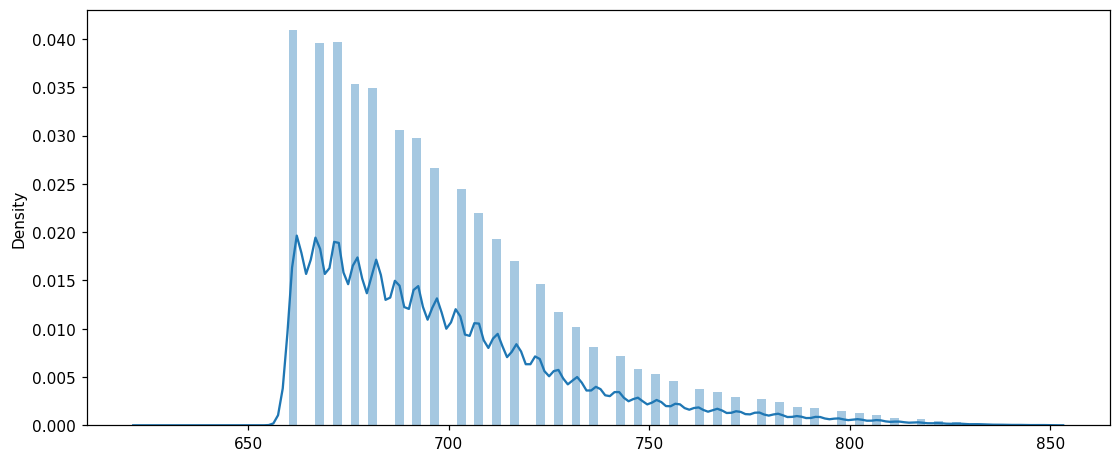

In [71]:
# Checking the distribution now
plt.figure(figsize=(12,5), dpi=110)
sns.distplot(x=df['fico'], bins=100)

<Figure size 6000x2100 with 0 Axes>

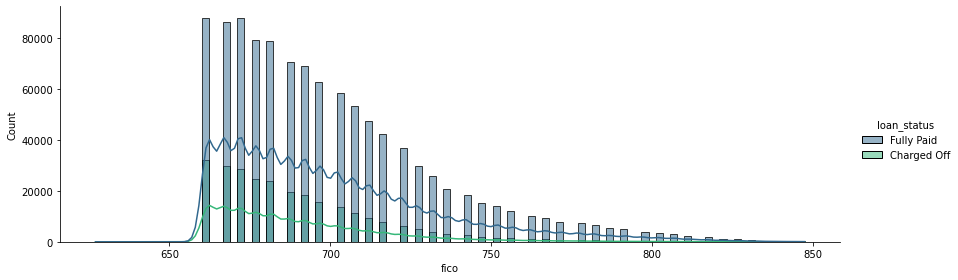

In [72]:
plt.figure(figsize=(20,7), dpi=300)
sns.displot(data=df, x='fico', hue='loan_status', bins=100, height=4, aspect=3, kde=True, palette='viridis')

In [73]:
df.groupby('loan_status')['fico'].describe()

count        mean        std    min    25%    50%    75%  \
loan_status                                                                 
Charged Off   266811.0  689.806507  25.918209  662.0  672.0  682.0  702.0   
Fully Paid   1065052.0  700.134911  32.769810  627.0  677.0  692.0  717.0   

               max  
loan_status         
Charged Off  847.5  
Fully Paid   847.5

<AxesSubplot:xlabel='fico', ylabel='loan_status'>

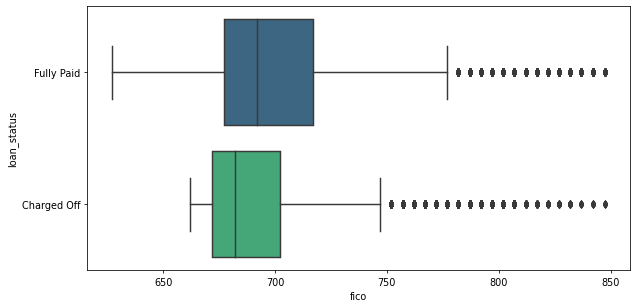

In [74]:
plt.figure(figsize=(10,5), dpi=70)
sns.boxplot(data=df, y='loan_status', x='fico', palette='viridis')
# In boxplot we take the mean value difference in account

In [75]:
# Feature 8 & 9: Check grade and subgrade now
if_null_values('grade')

'No missing values'

In [76]:
if_null_values('sub_grade')

'No missing values'

In [77]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [78]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

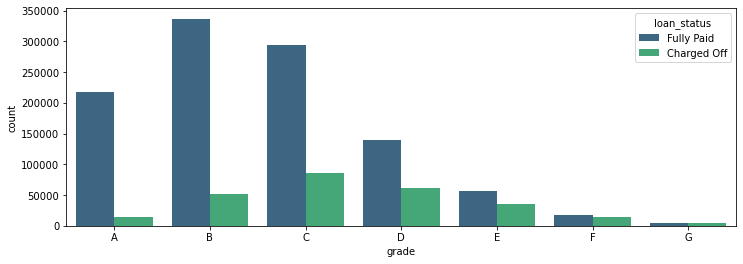

In [79]:
plt.figure(figsize=(12,4))
sns.countplot(x='grade',data=df,hue='loan_status', order=sorted(df['grade'].unique()), palette='viridis');

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

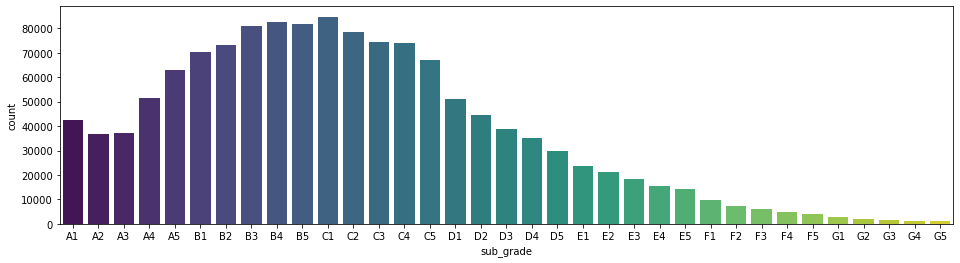

In [80]:
plt.figure(figsize=(16,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='viridis')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

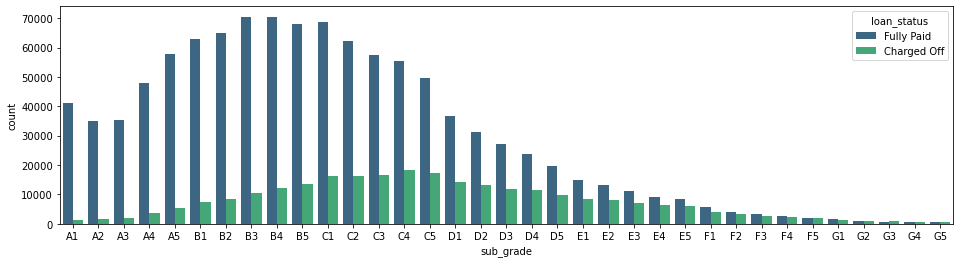

In [81]:
plt.figure(figsize=(16,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='viridis' ,hue='loan_status')

In [82]:
# Grade is already embedded in the Sub-grade feature. So we can drop grades
df = df.drop('grade',axis=1)

In [83]:
# Creating dummies for sub_grade
dummies_sub_grade = pd.get_dummies(df['sub_grade'], drop_first=True)
df = pd.concat([df.drop('sub_grade', axis=1), dummies_sub_grade], axis=1)
df.shape

(1331863, 106)

In [84]:
# Feature 10: home_ownership feature check
if_null_values('home_ownership')

'No missing values'

In [85]:
df['home_ownership'].value_counts()

MORTGAGE    656519
RENT        531602
OWN         143266
ANY            285
OTHER          143
NONE            48
Name: home_ownership, dtype: int64

In [86]:
# merging 'ANY' and 'NONE' into 'OTHER'
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

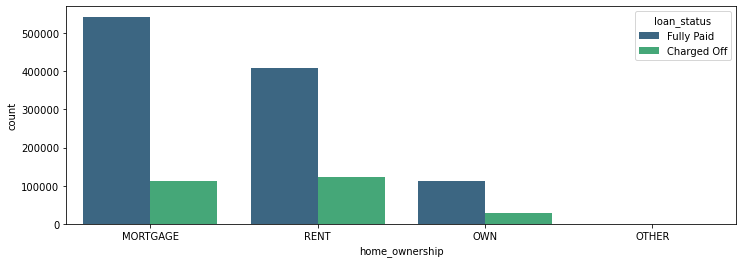

In [87]:
plt.figure(figsize=(12,4))
sns.countplot(x='home_ownership',data=df,hue='loan_status', palette='viridis')

In [88]:
df['home_ownership'].value_counts()

MORTGAGE    656519
RENT        531602
OWN         143266
OTHER          476
Name: home_ownership, dtype: int64

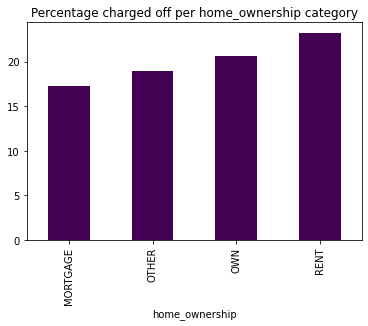

In [89]:
# Percentage charged off per home_ownership category.

charged_off = df[df['loan_status']=="Charged Off"].groupby("home_ownership").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("home_ownership").count()['loan_status']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percentage_charged_off.plot(kind='bar', cmap='viridis')
plt.title("Percentage charged off per home_ownership category");

In [90]:
# There are differences visible by categorical features. So let's create dummies
dummies_home_ownership = pd.get_dummies(df['home_ownership'], drop_first=True)
df = pd.concat([df.drop('home_ownership', axis=1), dummies_home_ownership], axis=1)
df.shape

(1331863, 108)

In [91]:
# Feature 11: application_type feature 
# Indicates whether the loan is an individual application or a joint application with two co-borrowers
if_null_values('application_type')

'No missing values'

In [92]:
df['application_type'].value_counts()

Individual    1306142
Joint App       25721
Name: application_type, dtype: int64

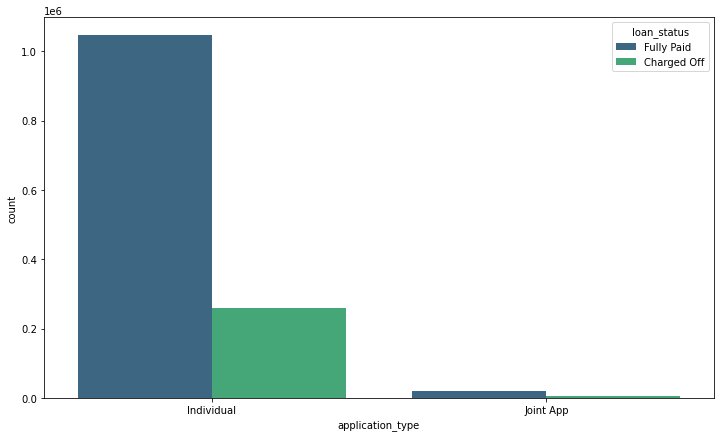

In [93]:
plt.figure(figsize=(12,7))
sns.countplot(x='application_type',data=df,hue='loan_status', palette='viridis');

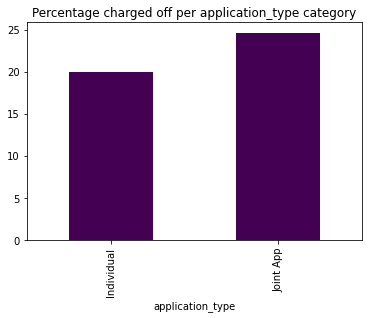

In [94]:
charged_off = df[df['loan_status']=="Charged Off"].groupby("application_type").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("application_type").count()['loan_status']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percentage_charged_off.plot(kind='bar', cmap='viridis')
plt.title("Percentage charged off per application_type category");

In [95]:
# The relation is visible. Let's create dummies now.
dummies_application_type = pd.get_dummies(df['application_type'], drop_first=True)
df = pd.concat([df.drop('application_type', axis=1), dummies_application_type], axis=1)
df.shape

(1331863, 108)

In [96]:
# Feature 12 : initial_list_status, possible values are W,F
if_null_values('initial_list_status')

'No missing values'

In [97]:
df['initial_list_status'].value_counts()

w    775284
f    556579
Name: initial_list_status, dtype: int64

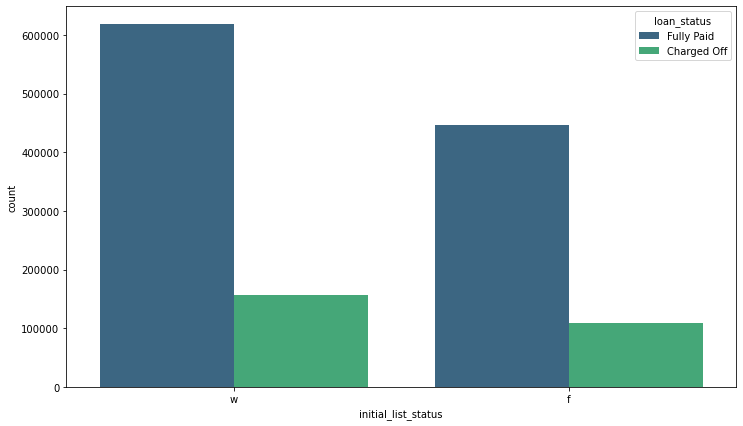

In [98]:
plt.figure(figsize=(12,7))
sns.countplot(x='initial_list_status',data=df,hue='loan_status', palette='viridis');

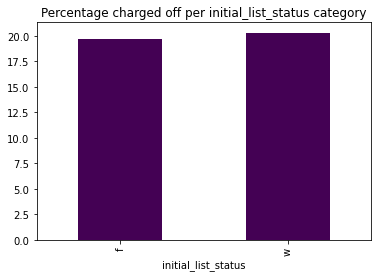

In [99]:
charged_off = df[df['loan_status']=="Charged Off"].groupby("initial_list_status").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("initial_list_status").count()['loan_status']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percentage_charged_off.plot(kind='bar', cmap='viridis')
plt.title("Percentage charged off per initial_list_status category");

In [100]:
# The data is nt visible related, we can drop this feature
df = df.drop('initial_list_status', axis=1)

In [101]:
# Feature 13: int_rate
if_null_values('int_rate')

'No missing values'

In [102]:
df['int_rate'].describe()

count    1.331863e+06
mean     1.325328e+01
std      4.766144e+00
min      5.310000e+00
25%      9.750000e+00
50%      1.274000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

In [103]:
df.groupby('loan_status')['int_rate'].describe()

count       mean       std   min    25%    50%    75%    max
loan_status                                                                  
Charged Off   266811.0  15.718902  4.909394  5.31  12.29  15.05  18.55  30.99
Fully Paid   1065052.0  12.635602  4.523765  5.31   9.17  12.29  15.31  30.99

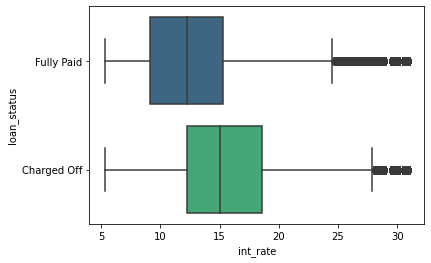

In [104]:
sns.boxplot(data=df, y='loan_status', x='int_rate', palette='viridis');
# The difference in mean value is seen here, so we need this feature

In [105]:
# Feature 14: loan_amnt
if_null_values('loan_amnt')

'No missing values'

In [106]:
df['loan_amnt'].describe()

count    1.331863e+06
mean     1.430529e+04
std      8.631064e+03
min      5.000000e+02
25%      7.800000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

In [107]:
df.groupby('loan_status')['loan_amnt'].describe()

count          mean          std    min     25%      50%  \
loan_status                                                                 
Charged Off   266811.0  15490.884934  8763.363060  900.0  9000.0  14125.0   
Fully Paid   1065052.0  14008.285746  8571.959731  500.0  7400.0  12000.0   

                 75%      max  
loan_status                    
Charged Off  20125.0  40000.0  
Fully Paid   20000.0  40000.0

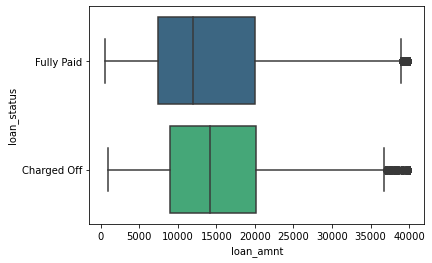

In [108]:
sns.boxplot(data=df, y='loan_status', x='loan_amnt', palette='viridis');
# Mean difference is seen, so loan_amnt should be taken 

In [109]:
# Feature 15: num_actv_bc_tl
# Number of currently active bankcard accounts.
if_null_values('num_actv_bc_tl')

'% of missing values = 5.02'

In [110]:
df['num_actv_bc_tl'].describe()

count    1.264799e+06
mean     3.635276e+00
std      2.240979e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      3.500000e+01
Name: num_actv_bc_tl, dtype: float64

In [111]:
# The values are inside 0 to 35, the mean is 3.64(app). So we can fill the nan values with the value close to 3.64 which is 4
df['num_actv_bc_tl'] = df['num_actv_bc_tl'].fillna(4)

In [112]:
df['num_actv_bc_tl'].isnull().sum()

0

In [113]:
df.groupby('loan_status')['num_actv_bc_tl'].describe()

count      mean       std  min  25%  50%  75%   max
loan_status                                                         
Charged Off   266811.0  3.829872  2.315706  0.0  2.0  3.0  5.0  30.0
Fully Paid   1065052.0  3.609492  2.149113  0.0  2.0  3.0  5.0  35.0

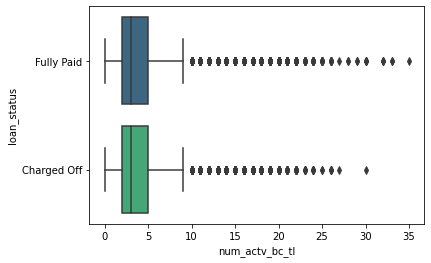

In [114]:
sns.boxplot(data=df, y='loan_status', x='num_actv_bc_tl', palette='viridis');

In [115]:
# There are some outliers when the value goes > 9. Let's exclude them from the dataset
df = df[df['num_actv_bc_tl'] < 10]
df.groupby('loan_status')['num_actv_bc_tl'].describe()

count      mean       std  min  25%  50%  75%  max
loan_status                                                        
Charged Off   260027.0  3.627189  1.941798  0.0  2.0  3.0  5.0  9.0
Fully Paid   1045867.0  3.463797  1.855088  0.0  2.0  3.0  4.0  9.0

<AxesSubplot:xlabel='num_actv_bc_tl', ylabel='loan_status'>

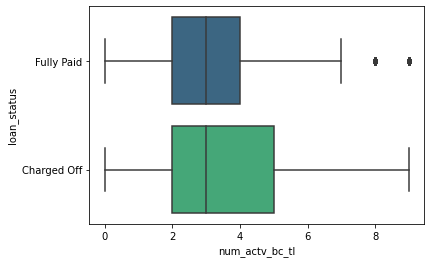

In [116]:
sns.boxplot(data=df, y='loan_status', x='num_actv_bc_tl', palette='viridis')
# Now there are some differences in two kind of values. We will keep this data now

In [117]:
df.shape

(1305894, 107)

In [118]:
# Feature 16 : mort_acc
# Number of mortgage accounts.
if_null_values('mort_acc')

'% of missing values = 3.51'

In [119]:
df['mort_acc'].describe()

count    1.258966e+06
mean     1.649432e+00
std      1.979933e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      5.100000e+01
Name: mort_acc, dtype: float64

In [120]:
df.corr()['mort_acc'].drop('mort_acc').sort_values()

# Range of mort_acc is from 0 to 51 with mean at 1.66
# df['mort_acc'].isnull().sum()

RENT               -0.454743
earliest_cr_line   -0.290511
NY                 -0.103946
int_rate           -0.081588
OWN                -0.059689
                      ...   
revol_bal           0.208509
loan_amnt           0.218304
annual_inc          0.325346
total_acc           0.369084
tot_cur_bal         0.542883
Name: mort_acc, Length: 101, dtype: float64

In [121]:
# Looks like the tot_cur_bal and total_acc feature correlates with the mort_acc , this makes sense! 
# But we won't take tot_cur_bal into account because total current balance do not measure how many mortgage account someone have,
# It might be dependent on total number of accounts. Let's try this fillna() approach.
# We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry
total_acc_avg = df.groupby(by='total_acc').mean().mort_acc

In [122]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc



df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [123]:
df['mort_acc'] = df['mort_acc'].fillna(df.groupby('open_acc')['mort_acc'].transform(lambda x:x.value_counts().index[0]))
df['mort_acc'].isnull().sum()

0

In [124]:
df.groupby('loan_status')['mort_acc'].describe()

count      mean       std  min  25%  50%  75%   max
loan_status                                                         
Charged Off   260027.0  1.358528  1.791854  0.0  0.0  1.0  2.0  29.0
Fully Paid   1045867.0  1.712291  1.983086  0.0  0.0  1.0  3.0  51.0

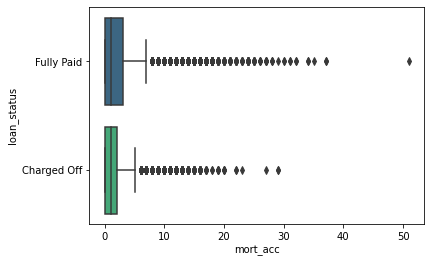

In [125]:
sns.boxplot(data=df, y='loan_status', x='mort_acc', palette='viridis')
# Since there are some outliers, we will drop rows with customers with mort_acc > 8.

In [126]:
df = df[df['mort_acc'] < 9]
df.groupby('loan_status')['mort_acc'].describe()

count      mean       std  min  25%  50%  75%  max
loan_status                                                        
Charged Off   258941.0  1.320868  1.692482  0.0  0.0  1.0  2.0  8.0
Fully Paid   1038383.0  1.649639  1.836011  0.0  0.0  1.0  3.0  8.0

<AxesSubplot:xlabel='mort_acc', ylabel='loan_status'>

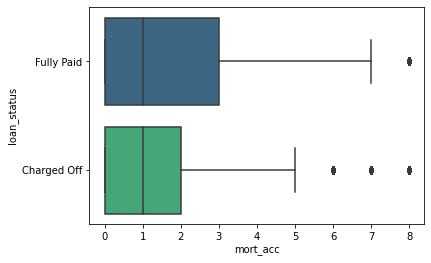

In [127]:
sns.boxplot(data=df, y='loan_status', x='mort_acc', palette='viridis')

In [128]:
# Minute difference can be seen in the mean 'mort_acc' between the two 'loan_status' categories.

# Feature 17 : total_acc
# The total number of credit lines currently in the borrower's credit file.
if_null_values('total_acc')

'No missing values'

In [129]:
df['total_acc'].describe()

count    1.297324e+06
mean     2.454241e+01
std      1.171241e+01
min      2.000000e+00
25%      1.600000e+01
50%      2.300000e+01
75%      3.100000e+01
max      1.760000e+02
Name: total_acc, dtype: float64

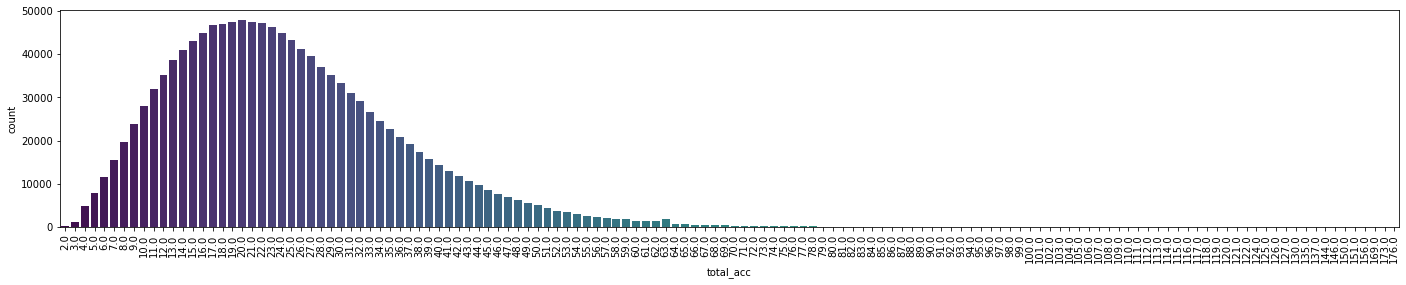

In [130]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x='total_acc', palette='viridis');

In [131]:
# Since there are some outliers, we will drop rows with customers with 'total_acc' > 63.
df = df[df['total_acc'] < 64]
df.shape

(1290644, 107)

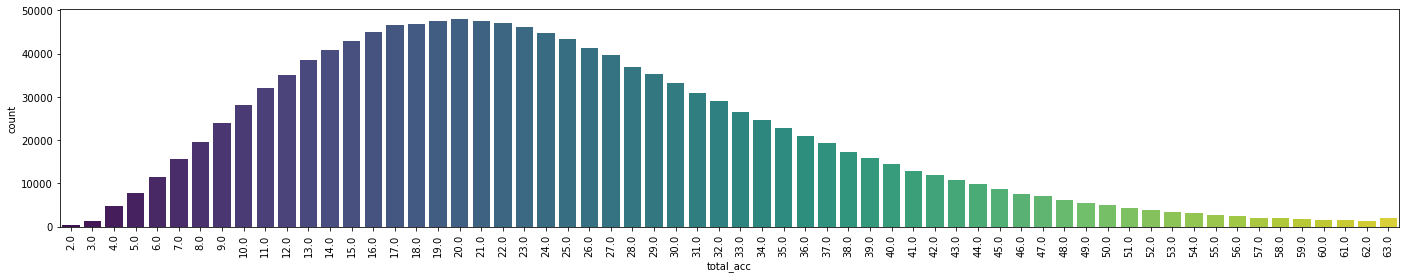

In [132]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x='total_acc', palette='viridis');

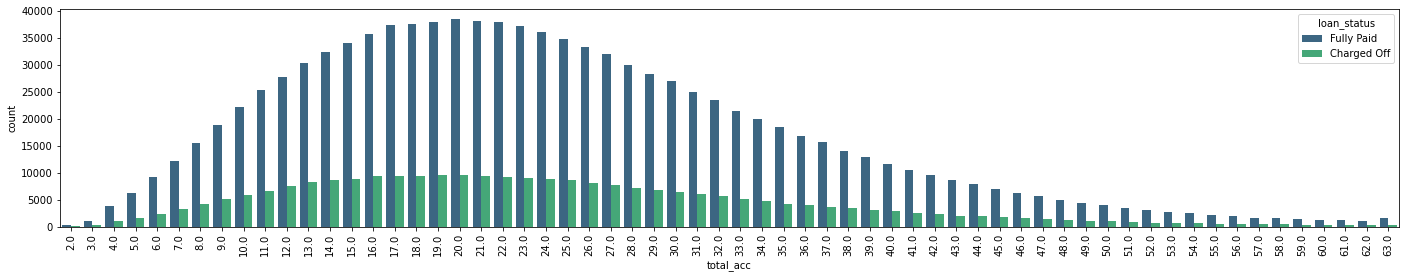

In [133]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x='total_acc', hue='loan_status', palette='viridis');

In [134]:
df.groupby('loan_status')['total_acc'].describe()
# For the difference in mean we will take this feature

count       mean        std  min   25%   50%   75%   max
loan_status                                                              
Charged Off   257506.0  23.990913  11.259406  2.0  16.0  22.0  31.0  63.0
Fully Paid   1033138.0  24.370858  11.189007  2.0  16.0  23.0  31.0  63.0

In [135]:
# Feature 17 : tot_cur_bal
# Total current balance of all accounts.
if_null_values('tot_cur_bal')

'% of missing values = 5.02'

In [136]:
df['tot_cur_bal'].describe()

count    1.223838e+06
mean     1.338969e+05
std      1.417759e+05
min      0.000000e+00
25%      2.864800e+04
50%      7.608300e+04
75%      2.035160e+05
max      3.610743e+06
Name: tot_cur_bal, dtype: float64

In [137]:
# There are many null values here, let's fill them up by mean values
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(df['tot_cur_bal'].describe()['mean'])
df['tot_cur_bal'].isnull().sum()

0

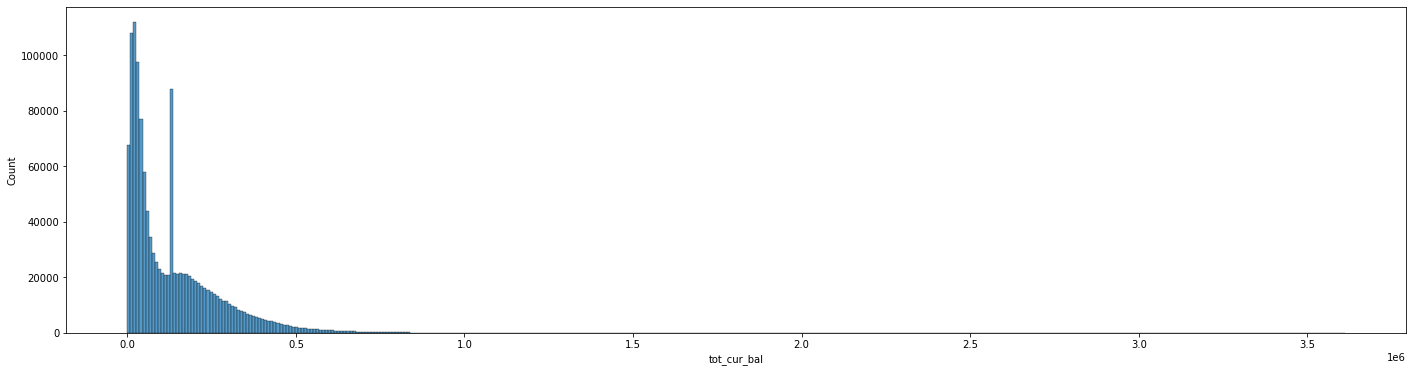

In [138]:
plt.figure(figsize=(24,6))
sns.histplot(data=df, x='tot_cur_bal', bins=400, palette='viridis');

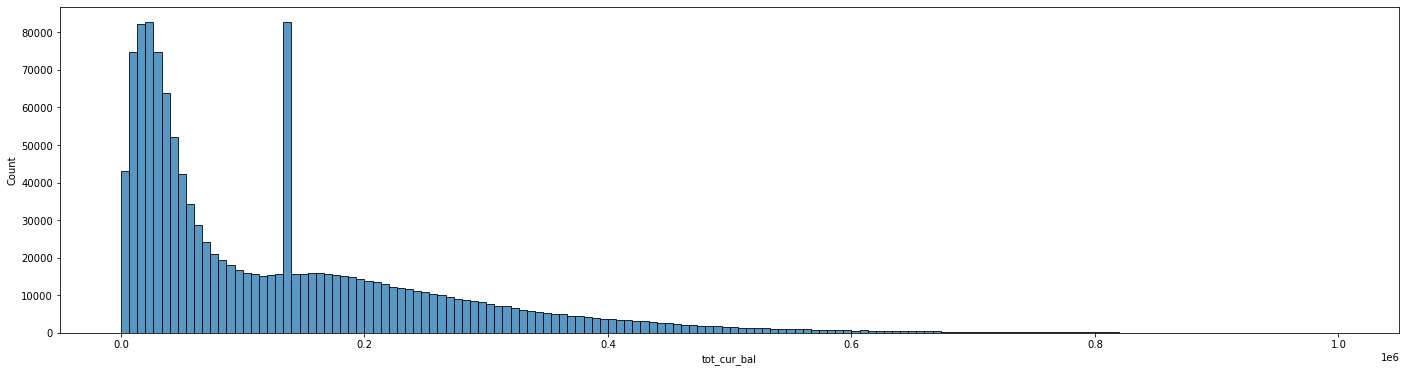

In [139]:
# Since there are some outliers, we will drop rows with customers with 'tot_cur_bal' > $1000000.
df = df[df['tot_cur_bal'] < 1000001]

plt.figure(figsize=(24,6))
sns.histplot(data=df, x='tot_cur_bal', bins=150, palette='viridis');

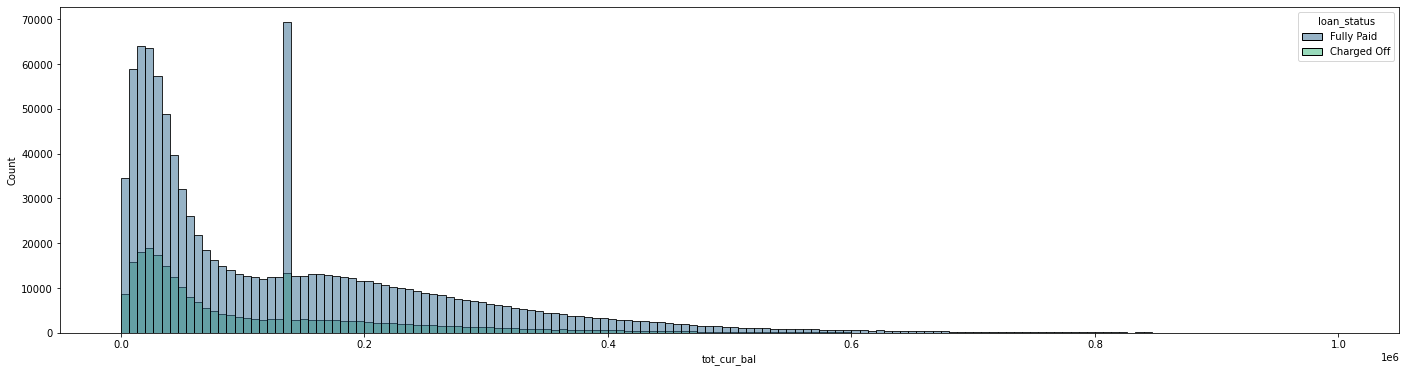

In [140]:
plt.figure(figsize=(24,6))
sns.histplot(data=df, x='tot_cur_bal', bins=150, hue='loan_status', palette='viridis');

In [141]:
df.groupby('loan_status')['tot_cur_bal'].describe()
# Mean 'tot_cur_bal' is higher in case of customers who fully paid the loan.
# We will take this feature

count           mean            std  min      25%      50%  \
loan_status                                                                   
Charged Off   257409.0  114593.991332  121746.934793  0.0  27745.0  63879.0   
Fully Paid   1032286.0  137737.176972  137669.362126  0.0  30822.0  95871.0   

                  75%       max  
loan_status                      
Charged Off  163378.0  998380.0  
Fully Paid   202912.0  999950.0

In [142]:
# Feature 18 : open_acc
# The number of open credit lines in the borrower's credit file.
if_null_values('open_acc')

'No missing values'

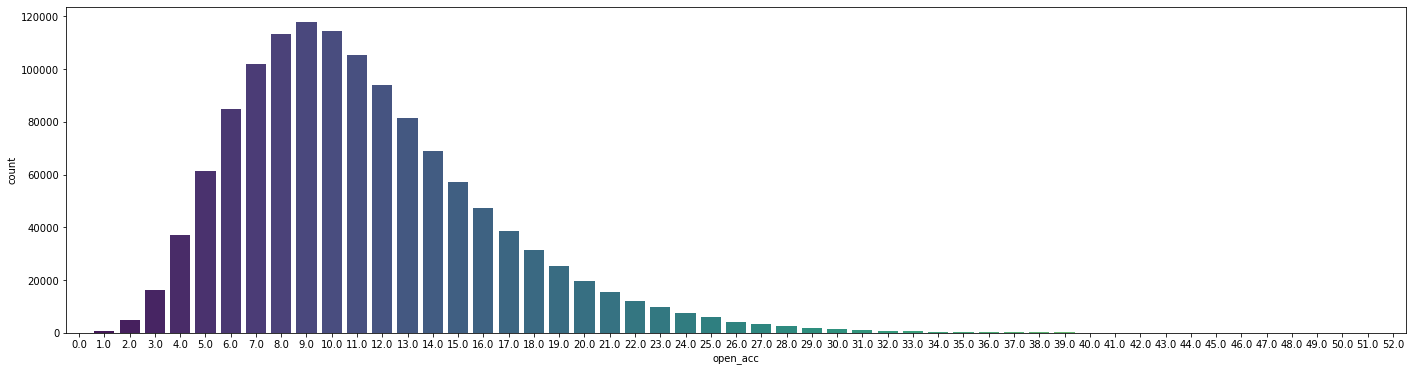

In [143]:
plt.figure(figsize=(24,6))
sns.countplot(data=df, x='open_acc', palette='viridis');

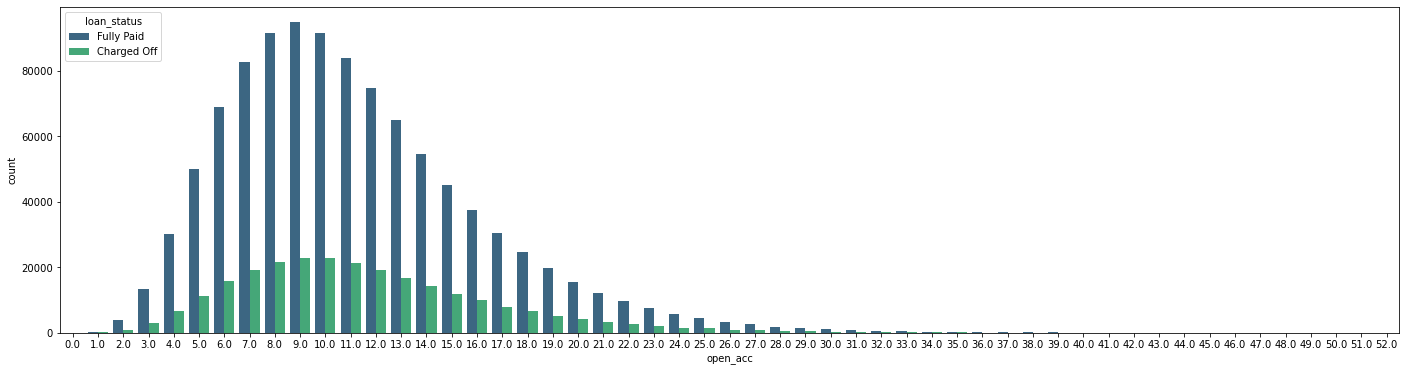

In [144]:
plt.figure(figsize=(24,6))
sns.countplot(data=df, x='open_acc', hue='loan_status', palette='viridis');

In [145]:
df.groupby('loan_status')['open_acc'].describe()
# Taking this feature

count       mean       std  min  25%   50%   75%   max
loan_status                                                            
Charged Off   257409.0  11.522942  5.171631  0.0  8.0  11.0  14.0  52.0
Fully Paid   1032286.0  11.199408  5.025010  0.0  8.0  10.0  14.0  52.0

In [146]:
# Feature 19 : pub_rec
# Number of derogatory public records.
if_null_values('pub_rec')

'No missing values'

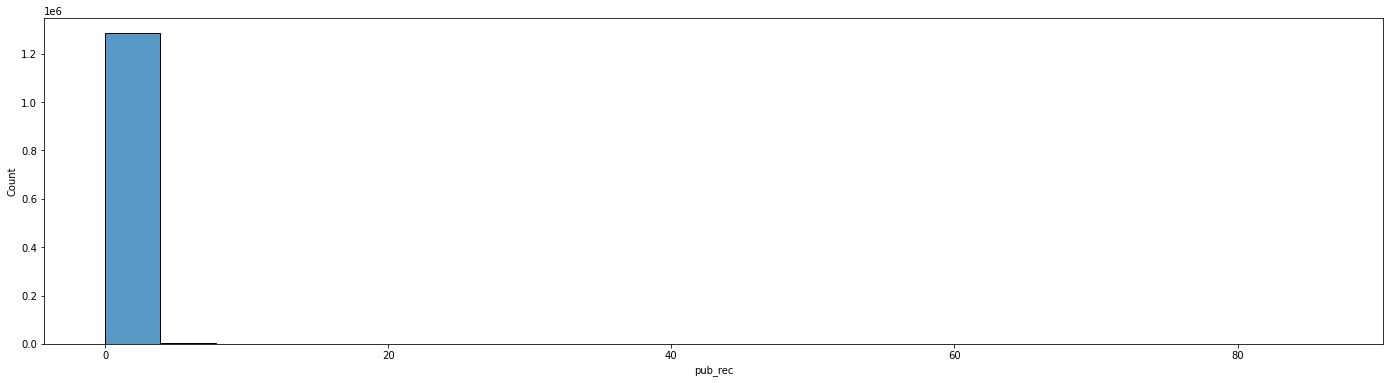

In [147]:
plt.figure(figsize=(24,6))
sns.histplot(data=df, x='pub_rec', palette='viridis');

In [148]:
# Removing Outliers, pub_rec>2
len(df[df['pub_rec'] > 2])*100/len(df)

0.932856217943002

In [149]:
df = df[df['pub_rec'] < 3]
df.groupby('loan_status')['pub_rec'].describe()

count      mean       std  min  25%  50%  75%  max
loan_status                                                        
Charged Off   254640.0  0.207399  0.455915  0.0  0.0  0.0  0.0  2.0
Fully Paid   1023024.0  0.174796  0.423222  0.0  0.0  0.0  0.0  2.0

In [150]:
# Feature 20 : pub_rec_bankruptcies
# Number of public record bankruptcies.
if_null_values('pub_rec_bankruptcies')

'% of missing values = 0.05'

In [151]:
# As this feature have very low percentage of missing values, we will drop the nan values from this feature
df['pub_rec_bankruptcies'].isnull().sum()

688

In [152]:
df.shape

(1277664, 107)

In [153]:
df = df[df['pub_rec_bankruptcies'].notna()]

In [154]:
df.shape

(1276976, 107)

In [155]:
df.groupby('loan_status')['pub_rec_bankruptcies'].describe()

count      mean       std  min  25%  50%  75%  max
loan_status                                                        
Charged Off   254524.0  0.145900  0.370959  0.0  0.0  0.0  0.0  2.0
Fully Paid   1022452.0  0.123882  0.343871  0.0  0.0  0.0  0.0  2.0

In [156]:
# Feature 21 : purpose
# A category provided by the borrower for the loan request.
if_null_values('purpose')

'No missing values'

In [157]:
len(df['purpose'].unique())

14

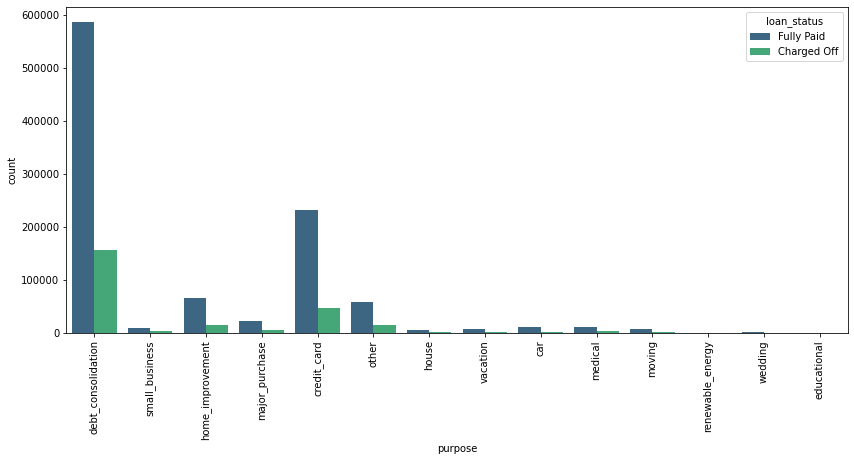

In [158]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x='purpose', hue='loan_status', palette='viridis');
plt.xticks(rotation=90);

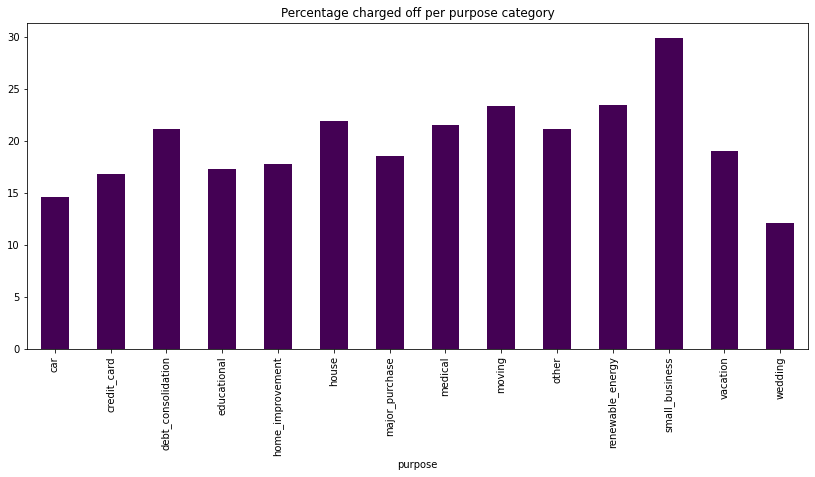

In [159]:
plt.figure(figsize=(14,6))
charged_off = df[df['loan_status']=="Charged Off"].groupby("purpose").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("purpose").count()['loan_status']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percentage_charged_off.plot(kind='bar', cmap='viridis')
plt.title("Percentage charged off per purpose category");

In [160]:
dummies_purpose = pd.get_dummies(df['purpose'], drop_first=True)
df = pd.concat([df.drop('purpose', axis=1), dummies_purpose], axis=1)

In [161]:
df.shape

(1276976, 119)

In [162]:
# Feature 22 : term
# The number of payments on the loan. Values are in months and can be either 36 or 60.
if_null_values('term')

'No missing values'

In [163]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [164]:
# Converting string into integers
df['term'] = df['term'].apply(lambda x: int(x[0:3]))

<AxesSubplot:xlabel='term', ylabel='count'>

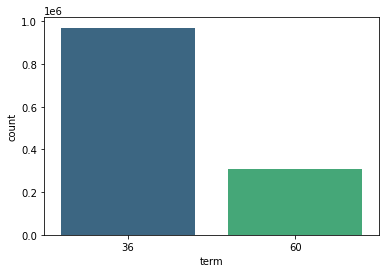

In [165]:
sns.countplot(data=df, x='term', palette='viridis')

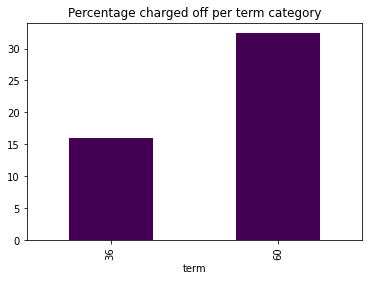

In [166]:
charged_off = df[df['loan_status']=="Charged Off"].groupby("term").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("term").count()['loan_status']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percentage_charged_off.plot(kind='bar', cmap='viridis')
plt.title("Percentage charged off per term category");

In [167]:
# Customers whose loan term was 60 months had almost double chance of charging off
dummies_term = pd.get_dummies(df['term'], drop_first=True)
pd.concat([df.drop('term', axis=1), dummies_term], axis=1)

annual_inc  earliest_cr_line  int_rate  loan_amnt  num_actv_bc_tl  \
0           55000.0              2003     13.99     3600.0             2.0   
1           65000.0              1999     11.99    24700.0             5.0   
2           63000.0              2000     10.78    20000.0             2.0   
4          104433.0              1998     22.45    10400.0             4.0   
5           34000.0              1987     13.44    11950.0             2.0   
...             ...               ...       ...        ...             ...   
2260686    119000.0              1992     14.49    23800.0             5.0   
2260688    130000.0              2004      9.49    18000.0             3.0   
2260690    180792.0              2002     13.99    29400.0             4.0   
2260691    157000.0              2011     14.49    32000.0             5.0   
2260697    110000.0              1999     14.49    24000.0             5.0   

         loan_status  mort_acc  tot_cur_bal  open_acc  pub_rec  ...  house  \
0         Fully Paid       1.0     144904.0       7.0      0.0  ...      0   
1         Fully Paid       4.0     204396.0      22.0      0.0  ...      0   
2         Fully Paid       5.0     189699.0       6.0      0.0  ...      0   
4         Fully Paid       6.0     331730.0      12.0      0.0  ...      0   
5         Fully Paid       0.0      12798.0       5.0      0.0  ...      0   
...              ...       ...          ...       ...      ...  ...    ...   
2260686   Fully Paid       5.0     372285.0      13.0      0.0  ...      0   
2260688   Fully Paid       3.0     168758.0      17.0      0.0  ...      0   
2260690   Fully Paid       3.0     663465.0      16.0      0.0  ...      0   
2260691  Charged Off       3.0     408701.0      14.0      0.0  ...      0   
2260697  Charged Off       2.0      62426.0      10.0      1.0  ...      0   

         major_purchase  medical moving  other renewable_energy  \
0                     0        0      0      0                0   
1                     0        0      0      0                0   
2                     0        0      0      0                0   
4                     1        0      0      0                0   
5                     0        0      0      0                0   
...                 ...      ...    ...    ...              ...   
2260686               0        0      0      0                0   
2260688               0        0      0      0                0   
2260690               0        0      0      0                0   
2260691               0        0      0      0                0   
2260697               0        0      0      0                0   

         small_business  vacation  wedding  60  
0                     0         0        0   0  
1                     1         0        0   0  
2                     0         0        0   1  
4                     0         0        0   1  
5                     0         0        0   0  
...                 ...       ...      ...  ..  
2260686               0         0        0   1  
2260688               0         0        0   1  
2260690               0         0        0   1  
2260691               0         0        0   1  
2260697               0         0        0   1  

[1276976 rows x 119 columns]

In [168]:
# Feature 23 : title
# The loan title provided by the borrower.
if_null_values('title')

'% of missing values = 1.24'

In [169]:
len(df['title'].unique())

59970

In [170]:
# Lots of unique categories, can't produce that many dummies. Dropping this feature
df = df.drop('title', axis=1)
df.shape

(1276976, 118)

In [171]:
# Feature 24 : revol_bal
# Total credit revolving balance.
if_null_values('revol_bal')

'No missing values'

<AxesSubplot:xlabel='revol_bal', ylabel='loan_status'>

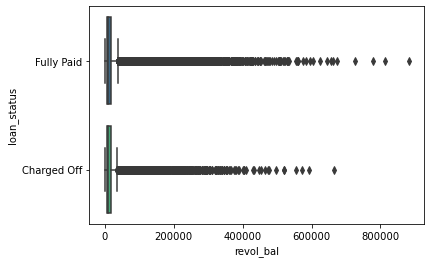

In [172]:
sns.boxplot(data=df, y='loan_status', x='revol_bal', palette='viridis')

In [173]:
# There are some outliers. Let's first check how many rows are there with 'revol_bal' > $100000.
len(df[df['revol_bal'] > 100000])

8148

In [174]:
# What percentage of total rows is 8148?
len(df[df['revol_bal'] > 100000]) * 100 / len(df)

0.6380699402338024

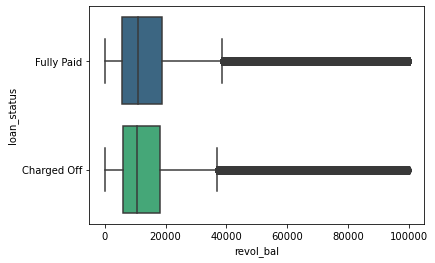

In [175]:
# It's just 0.64%, let's just drop these
df = df[df['revol_bal'] < 100001]
sns.boxplot(data=df, y='loan_status', x='revol_bal', palette='viridis');

In [176]:
# There are still some outliers but that's okay because we can't drop a good percentage of rows.
df.groupby('loan_status')['revol_bal'].describe()

count          mean           std  min     25%      50%  \
loan_status                                                                
Charged Off   253399.0  13912.122427  12005.965187  0.0  5850.0  10738.0   
Fully Paid   1015429.0  14403.836556  12874.753076  0.0  5797.0  10794.0   

                 75%      max  
loan_status                    
Charged Off  18231.0  99991.0  
Fully Paid   18886.0  99992.0

In [177]:
# Feature 25 : revol_util
# Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
if_null_values('revol_util')

'% of missing values = 0.06'

In [178]:
# Fill in missing values with mean
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())

In [179]:
df['revol_util'].isnull().sum()

0

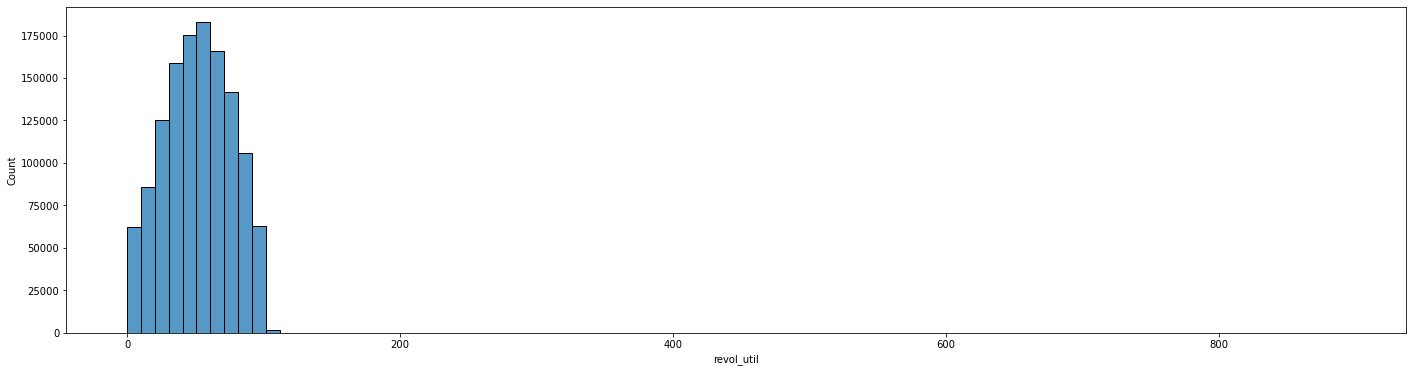

In [180]:
plt.figure(figsize=(24,6))
sns.histplot(data=df, x='revol_util', bins=88, palette='viridis');

In [181]:
# Outliers found, need to drop them
df = df[df['revol_util'] < 150]

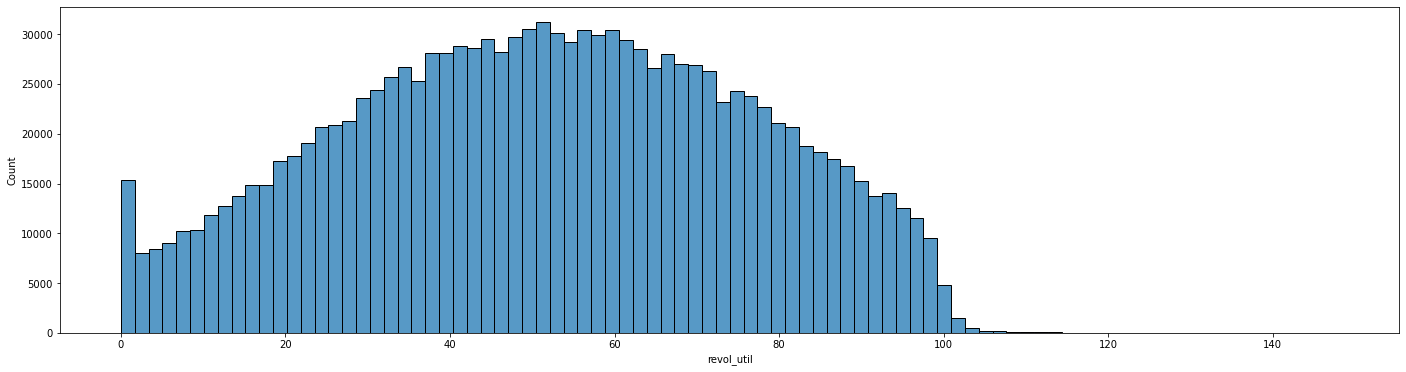

In [182]:
plt.figure(figsize=(24,6))
sns.histplot(data=df, x='revol_util', bins=88, palette='viridis');

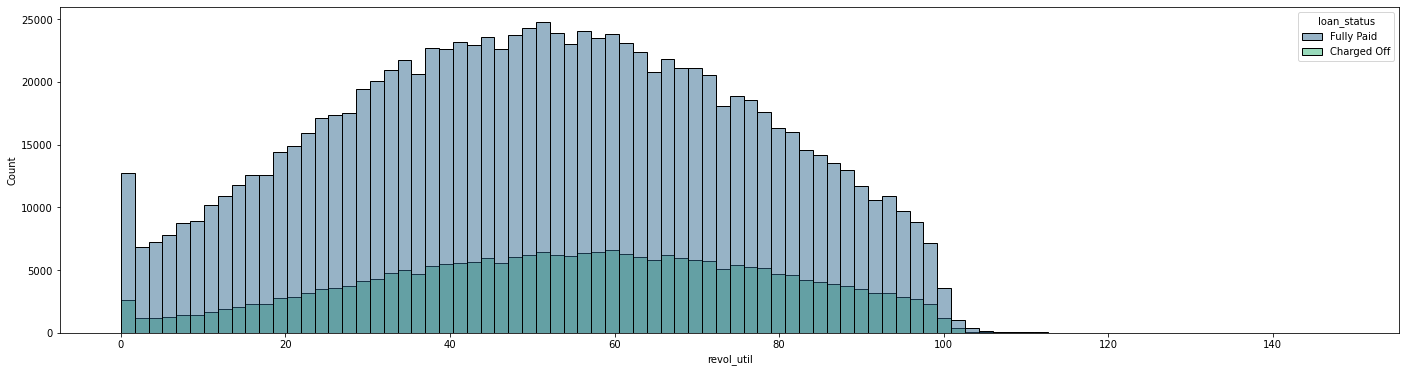

In [183]:
plt.figure(figsize=(24,6))
sns.histplot(data=df, x='revol_util', bins=88, hue='loan_status', palette='viridis');

<AxesSubplot:xlabel='revol_util', ylabel='loan_status'>

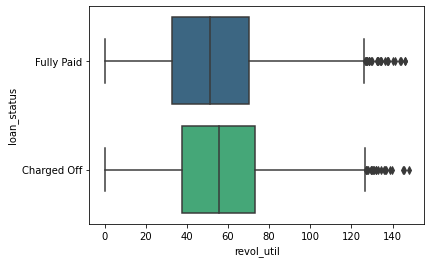

In [184]:
sns.boxplot(data=df, y='loan_status', x='revol_util', palette='viridis')

In [185]:
df.groupby('loan_status')['revol_util'].describe()

count       mean        std  min   25%   50%   75%    max
loan_status                                                               
Charged Off   253393.0  54.760310  23.873868  0.0  37.4  55.5  73.1  148.0
Fully Paid   1015417.0  51.033295  24.581578  0.0  32.5  51.3  70.0  146.1

In [186]:
# Feature 27 : verification_status
# Indicates if income was verified by LC, not verified, or if the income source was verified.
if_null_values('verification_status')

'No missing values'

In [187]:
df['verification_status'].value_counts()

Source Verified    489661
Not Verified       389783
Verified           389366
Name: verification_status, dtype: int64

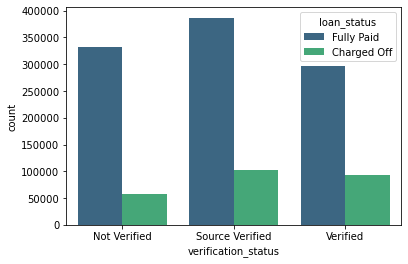

In [188]:
sns.countplot(data=df, x='verification_status', hue='loan_status', palette='viridis');

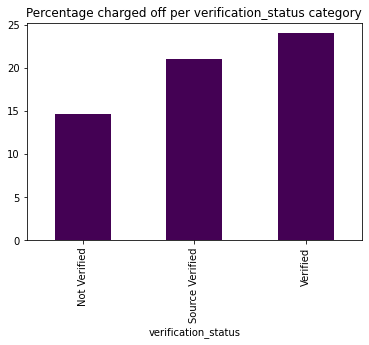

In [189]:
charged_off = df[df['loan_status']=="Charged Off"].groupby("verification_status").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("verification_status").count()['loan_status']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percentage_charged_off.plot(kind='bar', cmap='viridis')
plt.title("Percentage charged off per verification_status category");

In [190]:
dummies_verification_status = pd.get_dummies(df['verification_status'], drop_first=True)
df = pd.concat([df.drop('verification_status', axis=1), dummies_verification_status], axis=1)

In [191]:
df.shape

(1268810, 119)

In [192]:
# All features are done! Let us map the contents in the feature, i.e., 'Fully Paid' and 'Charged Off' to boolean values.
df['loan_status'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [193]:
df['loan_status']

0          1
1          1
2          1
4          1
5          1
          ..
2260680    1
2260685    0
2260688    1
2260690    1
2260697    0
Name: loan_status, Length: 1268810, dtype: int64

In [194]:
df.dtypes.value_counts()
# All values are numerical

uint8      103
float64     13
int64        3
dtype: int64

In [195]:
# Test Train Split
from sklearn.model_selection import train_test_split
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [197]:
# Scaling Features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [198]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [199]:
# Implementing Models : XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

xg = XGBClassifier()
xg.fit(X_train, y_train)
preds = xg.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.56      0.09      0.15     38115
           1       0.81      0.98      0.89    152207

    accuracy                           0.80    190322
   macro avg       0.68      0.53      0.52    190322
weighted avg       0.76      0.80      0.74    190322



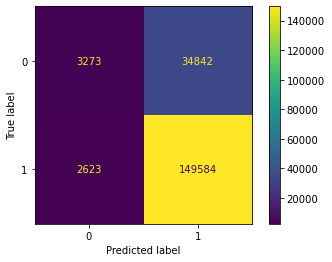

In [201]:
plot_confusion_matrix(xg,X_test,y_test)

In [202]:
# Implementing Models : Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
preds_rf = rf.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.56      0.09      0.15     38115
           1       0.81      0.98      0.89    152207

    accuracy                           0.80    190322
   macro avg       0.68      0.53      0.52    190322
weighted avg       0.76      0.80      0.74    190322



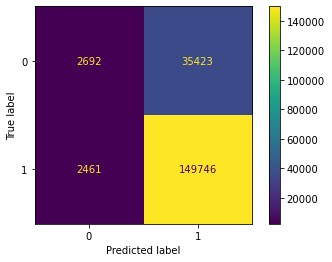

In [203]:
plot_confusion_matrix(rf,X_test,y_test)

In [207]:
# Implementing Models : ANN

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from sklearn.metrics import classification_report,confusion_matrix

In [208]:
ann = Sequential()

# input layer
ann.add(Dense(119,  activation='relu'))
ann.add(Dropout(0.1))

# hidden layer
ann.add(Dense(78,  activation='relu'))
ann.add(Dropout(0.1))

# hidden layer
ann.add(Dense(39, activation='relu'))
ann.add(Dropout(0.1))

# hidden layer
ann.add(Dense(19, activation='relu'))
ann.add(Dropout(0.1))

# output layer
ann.add(Dense(units=1,activation='sigmoid'))

# Compile model
ann.compile(loss='binary_crossentropy', optimizer='adam')

In [209]:
ann.fit(x=X_train, 
          y=y_train, 
          epochs=10,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/10
4213/4213 [==============================] - 23s 5ms/step - loss: 0.4608 - val_loss: 0.4546
Epoch 2/10
4213/4213 [==============================] - 18s 4ms/step - loss: 0.4552 - val_loss: 0.4541
Epoch 3/10
4213/4213 [==============================] - 18s 4ms/step - loss: 0.4537 - val_loss: 0.4534
Epoch 4/10
4213/4213 [==============================] - 18s 4ms/step - loss: 0.4527 - val_loss: 0.4527
Epoch 5/10
4213/4213 [==============================] - 19s 4ms/step - loss: 0.4521 - val_loss: 0.4535
Epoch 6/10
4213/4213 [==============================] - 18s 4ms/step - loss: 0.4515 - val_loss: 0.4530
Epoch 7/10
4213/4213 [==============================] - 18s 4ms/step - loss: 0.4510 - val_loss: 0.4524
Epoch 8/10
4213/4213 [==============================] - 18s 4ms/step - loss: 0.4508 - val_loss: 0.4525
Epoch 9/10
4213/4213 [==============================] - 18s 4ms/step - loss: 0.4503 - val_loss: 0.4532
Epoch 10/10
4213/4213 [==============================] - 18s 4ms/step - l

<AxesSubplot:>

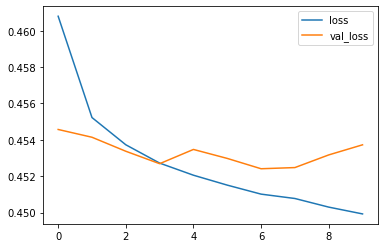

In [210]:
losses = pd.DataFrame(ann.history.history)
losses[['loss','val_loss']].plot()

In [211]:
predictions = (ann.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test,predictions))

5948/5948 [==============================] - 7s 1ms/step
              precision    recall  f1-score   support

           0       0.57      0.02      0.05     38115
           1       0.80      1.00      0.89    152207

    accuracy                           0.80    190322
   macro avg       0.69      0.51      0.47    190322
weighted avg       0.76      0.80      0.72    190322



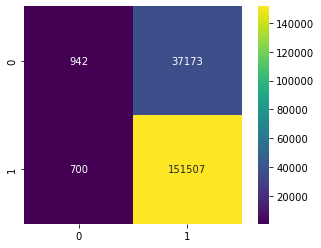

In [212]:
cm = confusion_matrix(y_test,predictions)
f = sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', square=True) #plot_confusion_matrix does not work directly for ANN